In [1]:
import find_biom
import pandas as pd
import os
import numpy as np
import csv
import importlib
from scipy import stats
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import plot
import utils
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix
import discriminant_pixel
import baseline_correction
import read_chroma
import matching
import mass_spec
from sklearn.linear_model import RidgeClassifier

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#path of th peak table
PEAK_TABLE_PATH = "C:/Users/Stan/pic/COVID/alignement/Processed/aligned_peak_table.csv"

In [3]:
labels_dict = {'negatif': 0, 'positif faible': 1, 'positif': 1}
group_dict = {0: 'neg_vs_posi', 1: 'neg_vs_posi_f_plus_posi', 2: 'neg_plus_posi_f_vs_posi', 3: 'neg_posi_vs_posi_f'}
group_dict_name = {'neg_vs_posi':0, 'neg_vs_posi_f_plus_posi':1, 'neg_plus_posi_f_vs_posi': 2, 'neg_vs_posi_f_vs_posi': 3}

In [4]:
mol_list, mol_data_list, labels = find_biom.group_by_labels_all_molecules_2(PEAK_TABLE_PATH)
mol_list = np.array(mol_list)

P VALUE THRESHOLD = 0.1

In [5]:
p_value_thresold=0.1
show=True

# Univariate

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. <font color='red'>Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.</font>

## Negatif vs (Positif Faible + Postif)

1


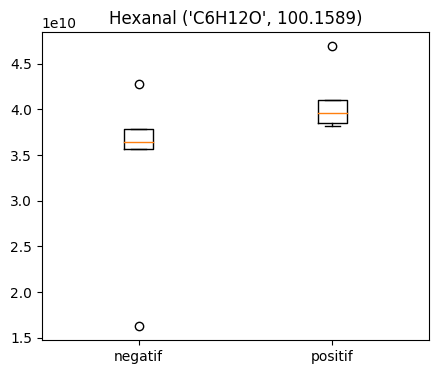

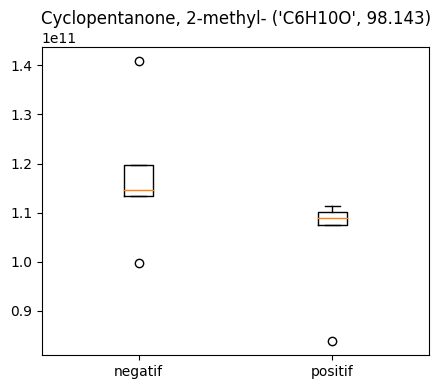

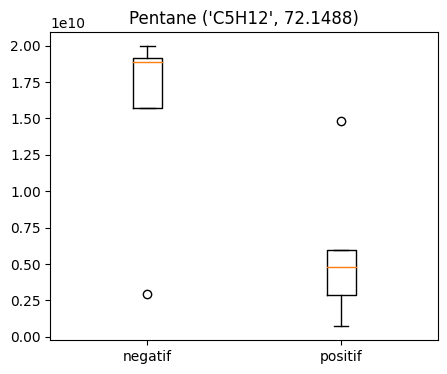

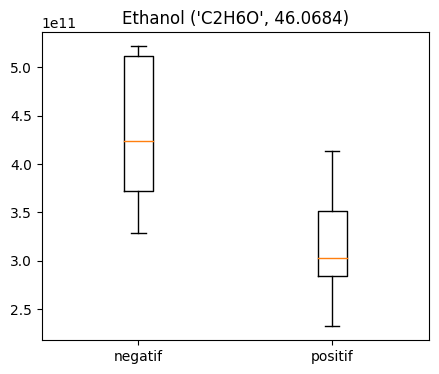

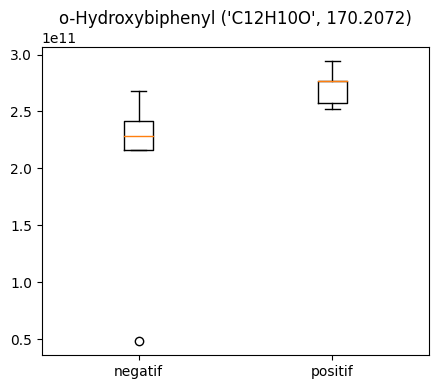

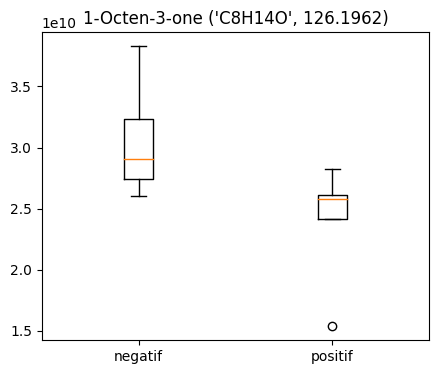

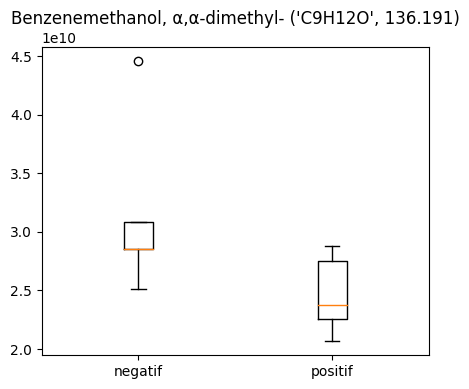

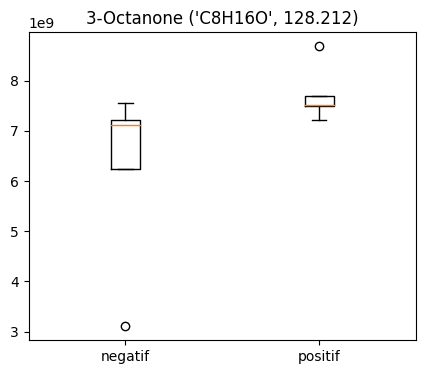

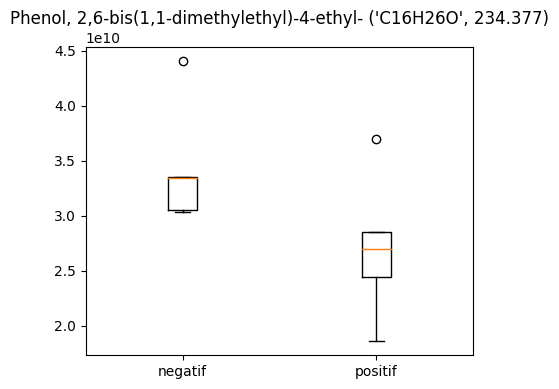

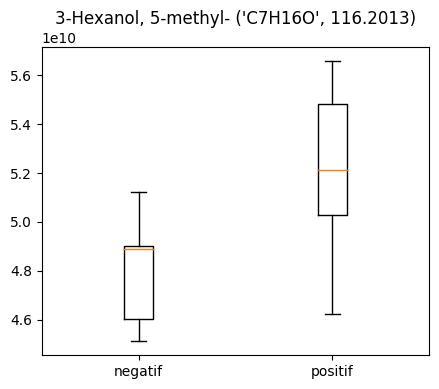

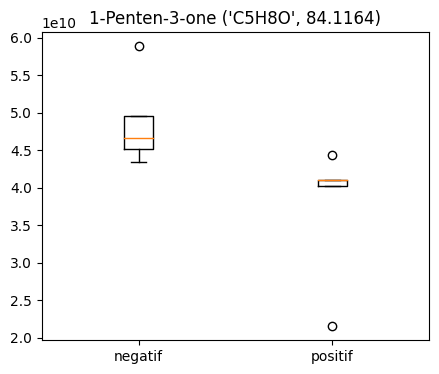

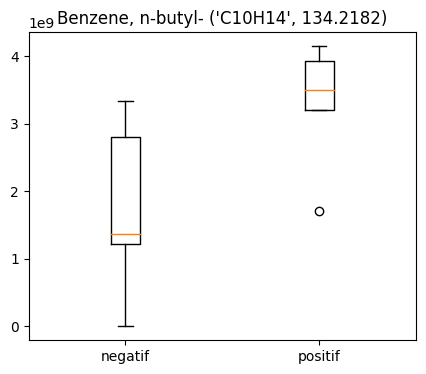

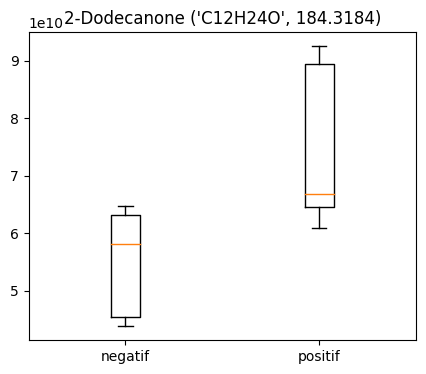

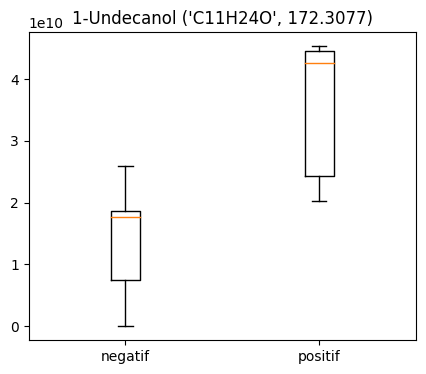

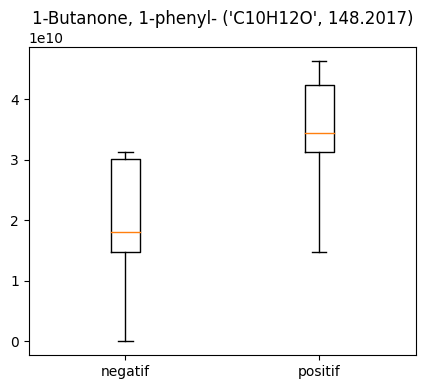

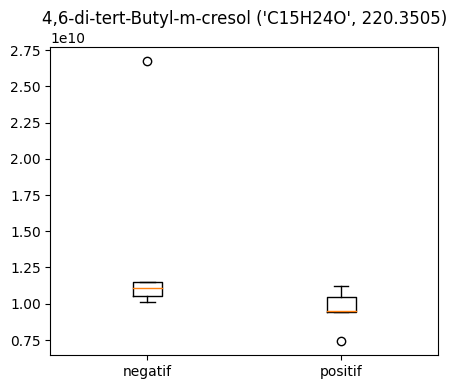

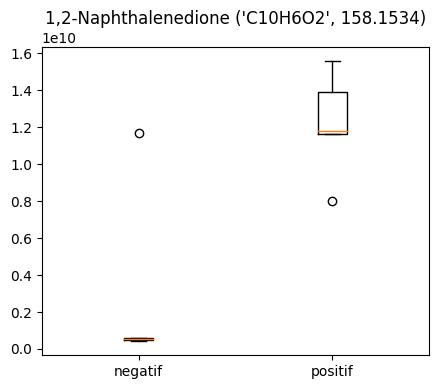

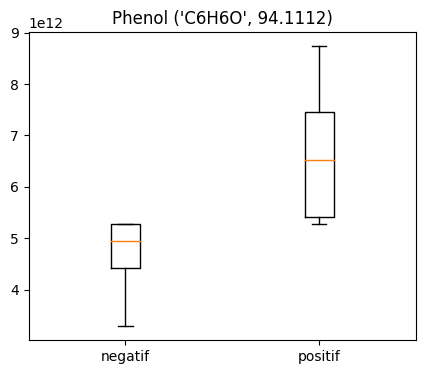

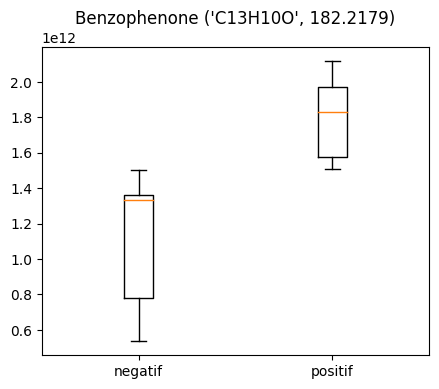

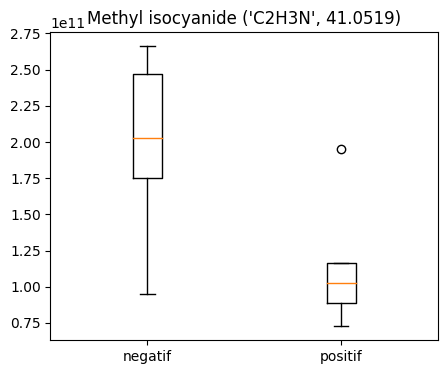

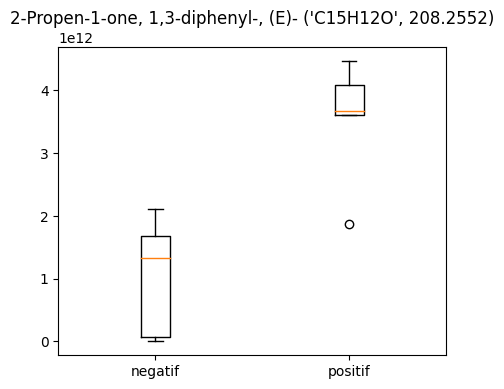

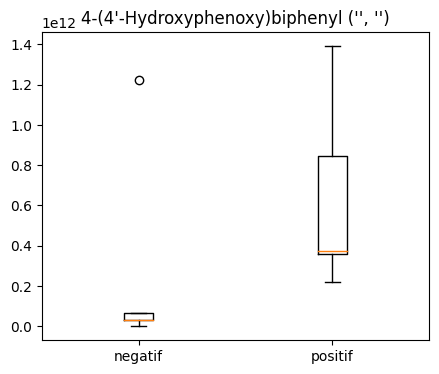

In [6]:
key = group_dict_name['neg_vs_posi_f_plus_posi']
print(key)
neg_vs_posi_f_plus_posi_mol = find_biom.filter_molecules_by_p_value_2(mol_list, mol_data_list, mode=key, p_value_thresold=p_value_thresold, plot=show) 

## (Negatif + Positif Faible) vs Positif

2


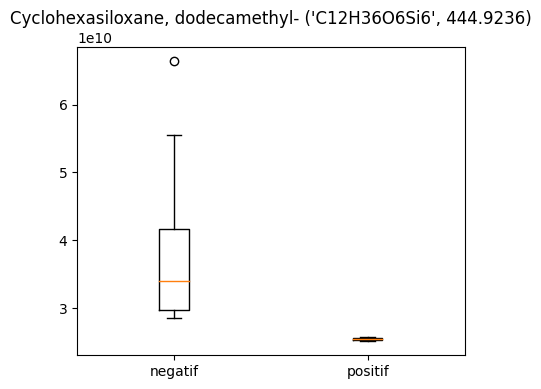

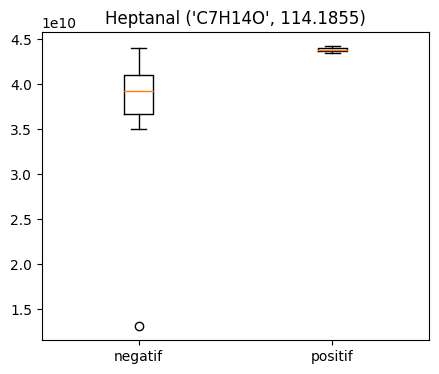

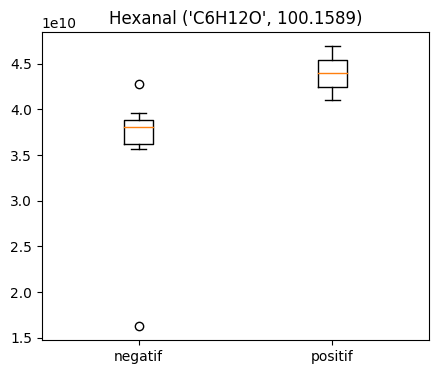

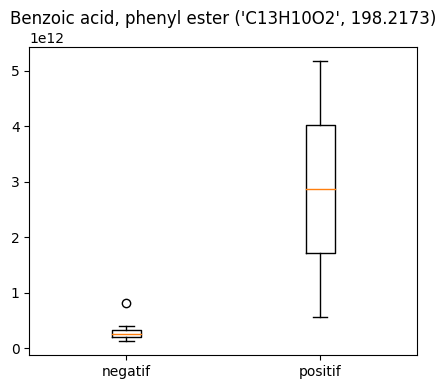

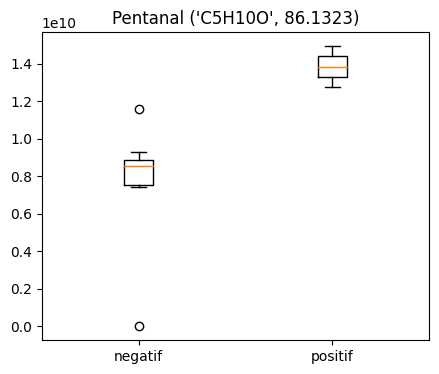

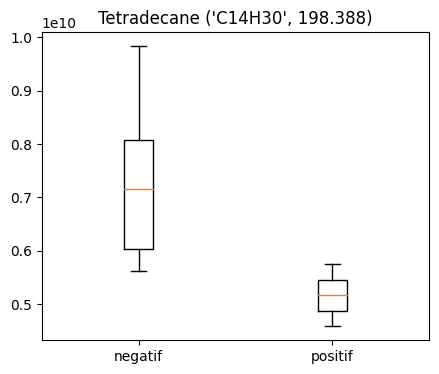

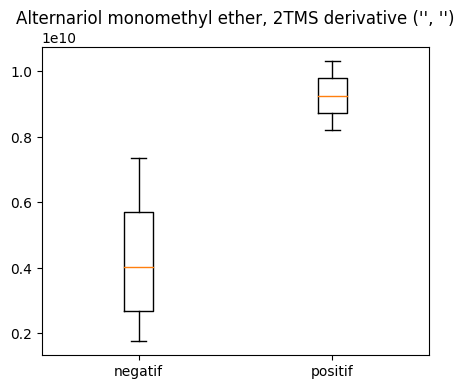

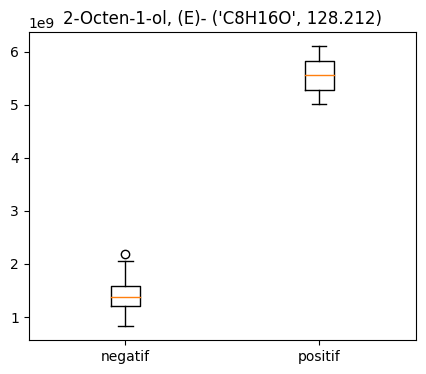

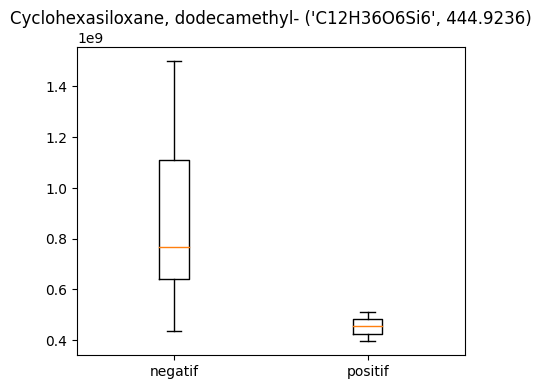

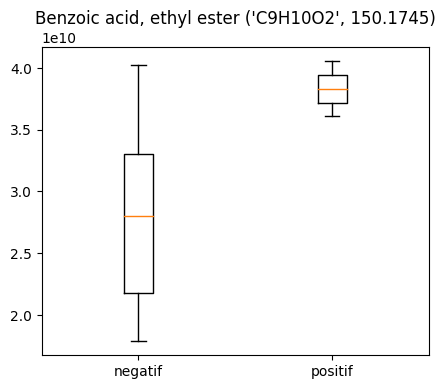

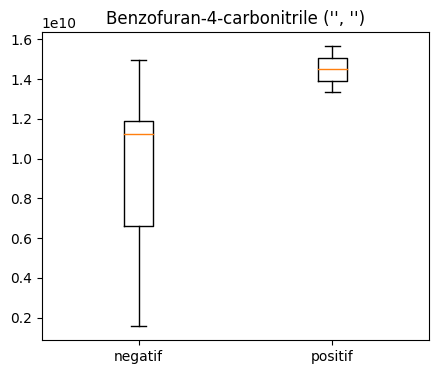

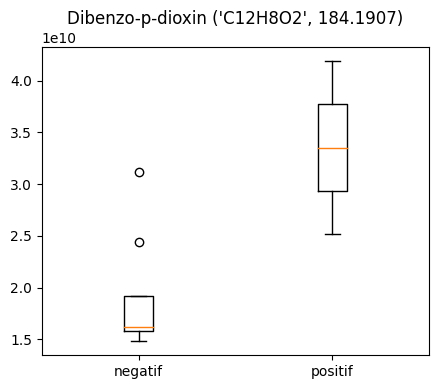

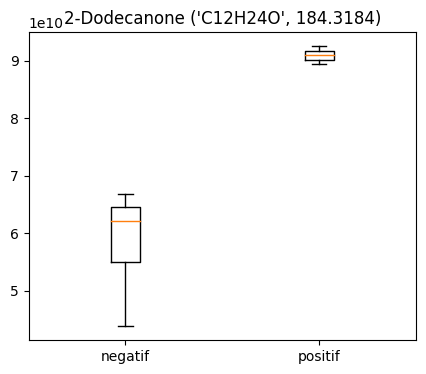

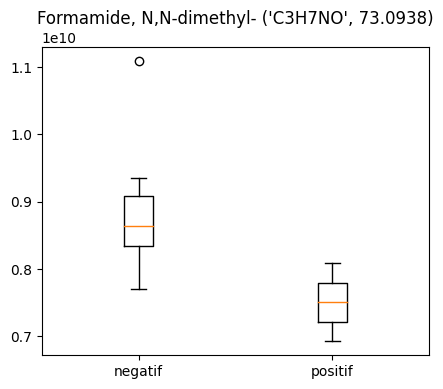

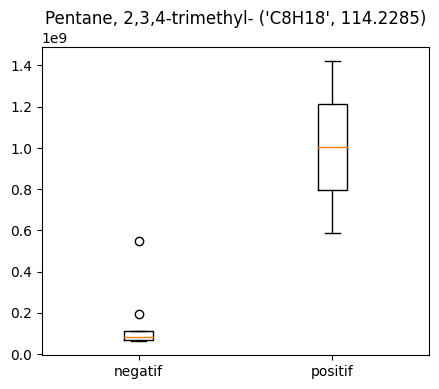

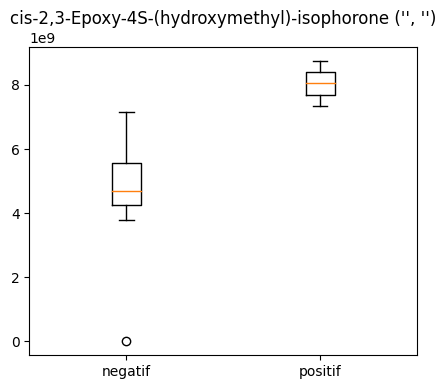

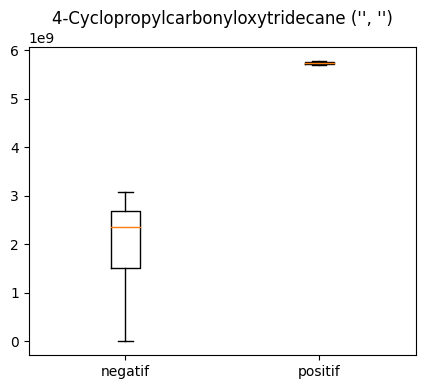

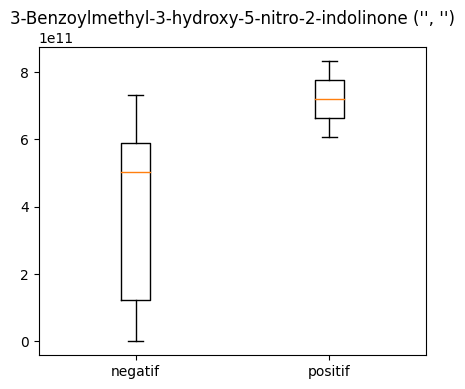

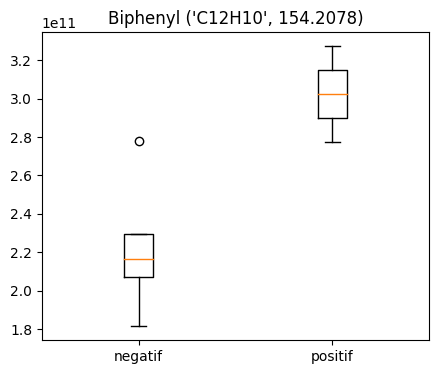

In [7]:
key = group_dict_name['neg_plus_posi_f_vs_posi']
print(key)
neg_plus_posi_f_vs_posi_mol = find_biom.filter_molecules_by_p_value_2(mol_list, mol_data_list, mode=key, p_value_thresold=p_value_thresold, plot=show) 

## Negatif vs Positif Faible vs Positif

3


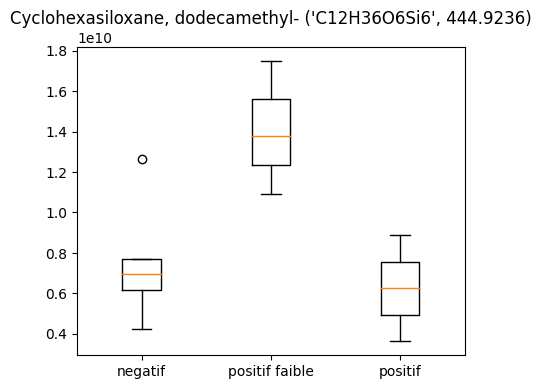

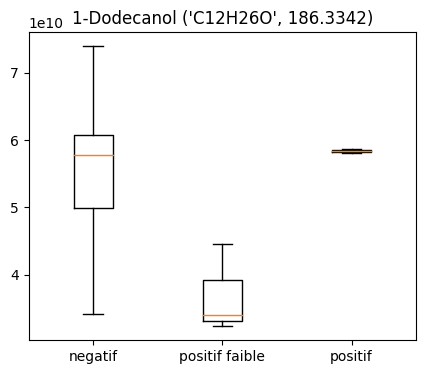

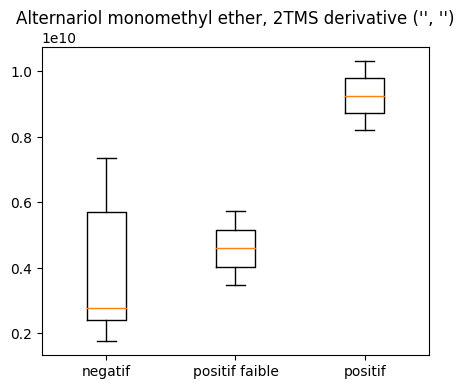

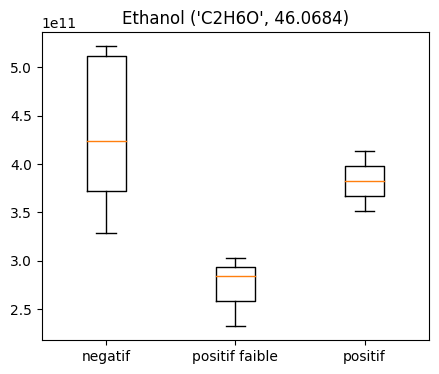

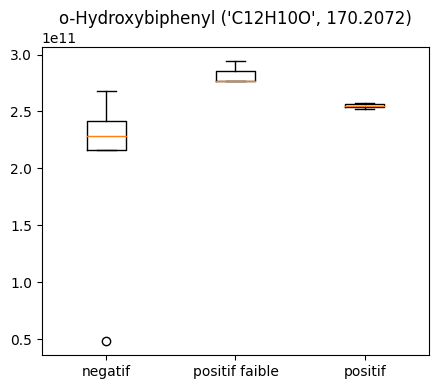

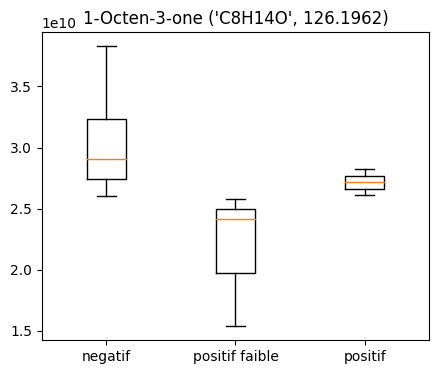

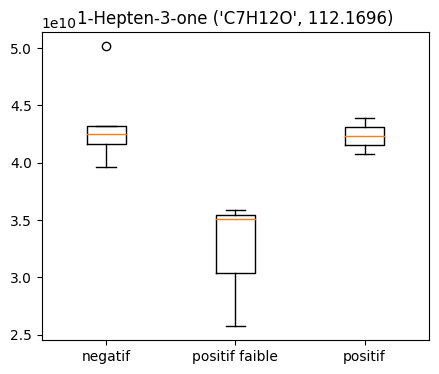

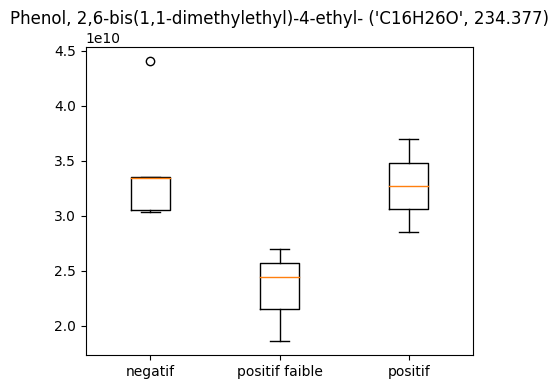

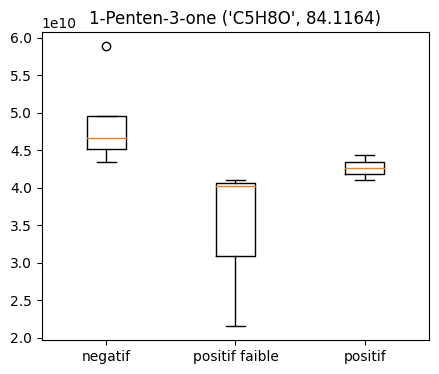

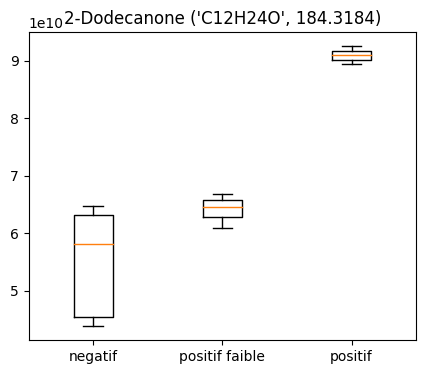

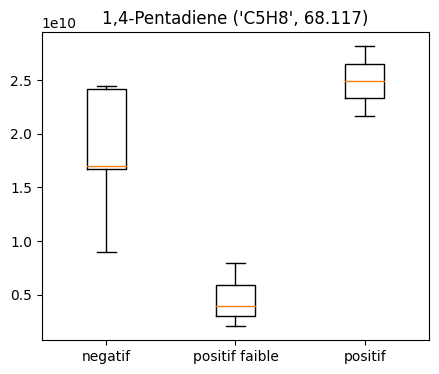

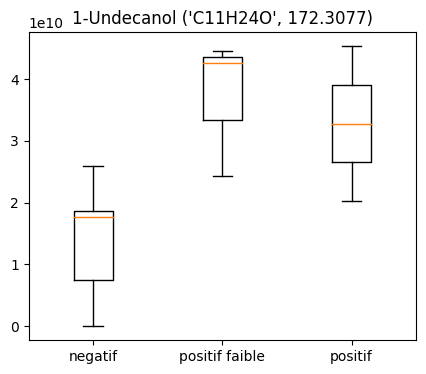

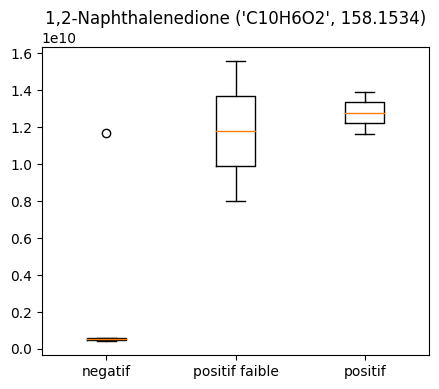

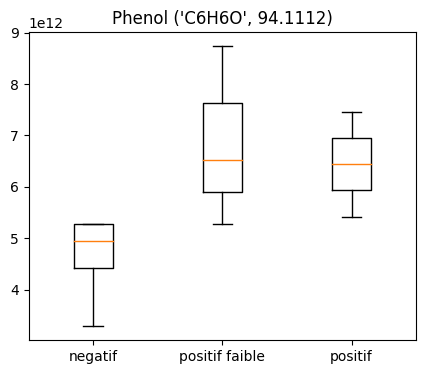

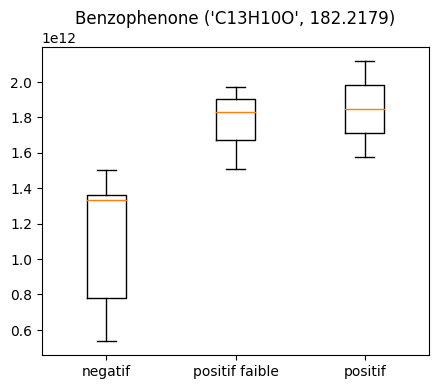

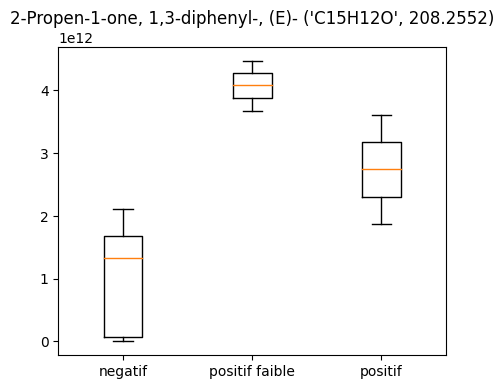

In [8]:
key = group_dict_name['neg_vs_posi_f_vs_posi']
print(key)
neg_vs_posi_f_vs_posi_mol = find_biom.filter_molecules_by_p_value_2(mol_list, mol_data_list, mode=key, p_value_thresold=p_value_thresold, plot=show, x_axis=['negatif','positif faible','positif']) 

## Negatif vs Positif - No Positif Faible

0


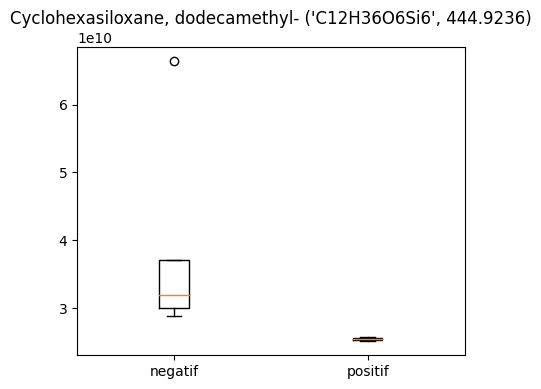

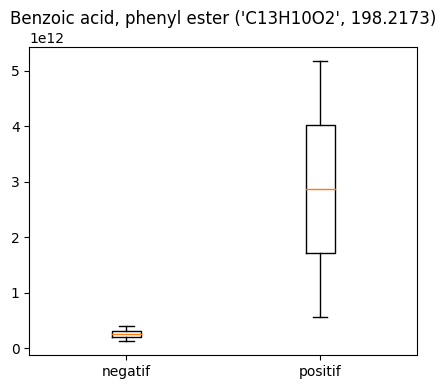

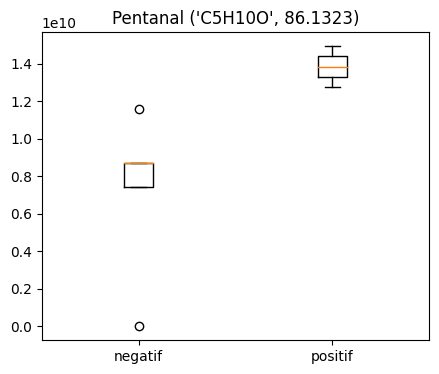

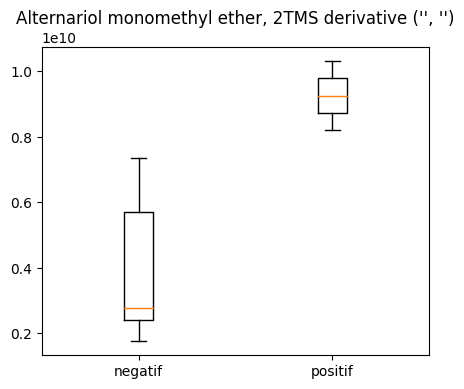

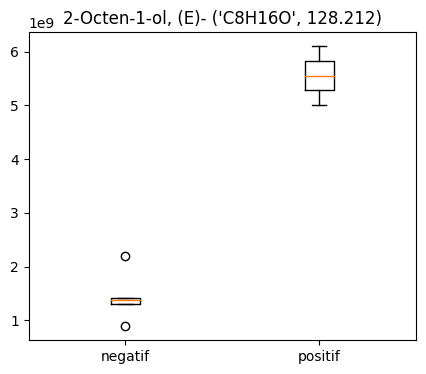

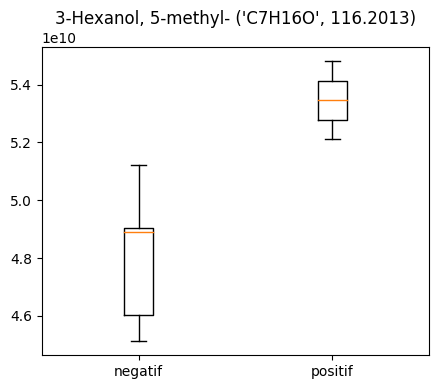

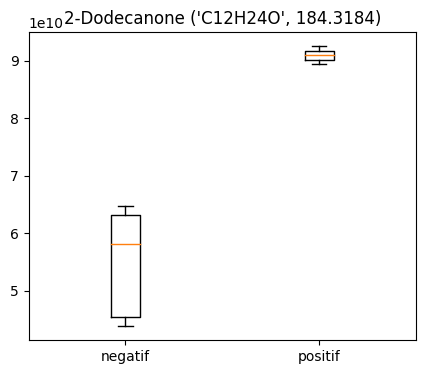

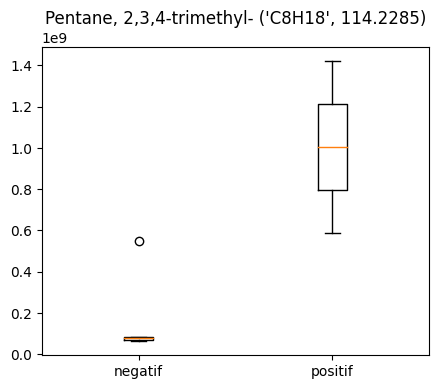

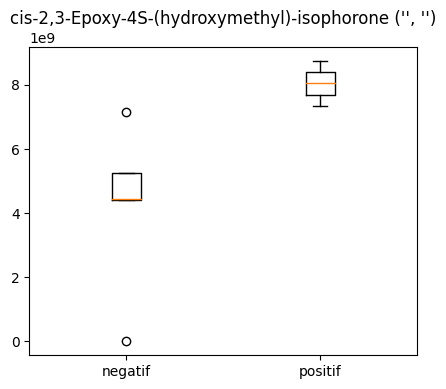

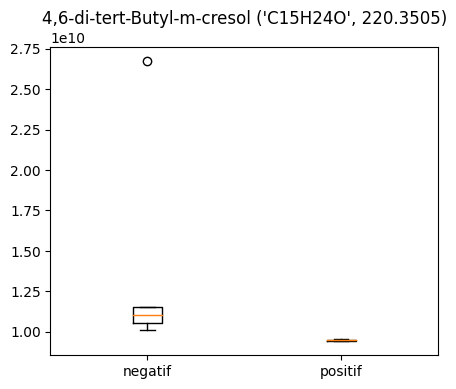

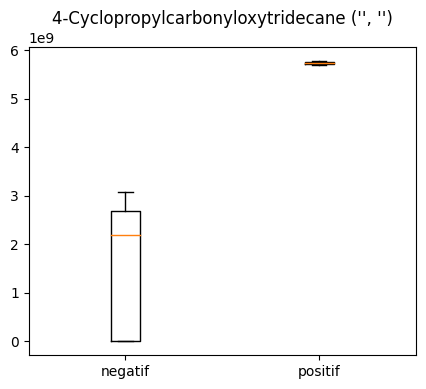

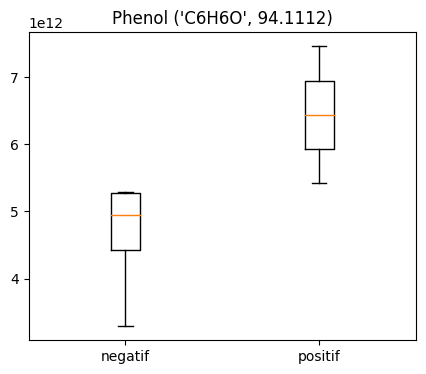

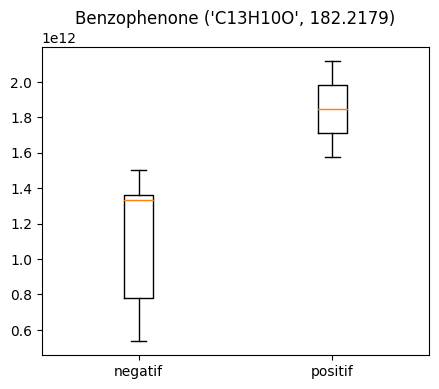

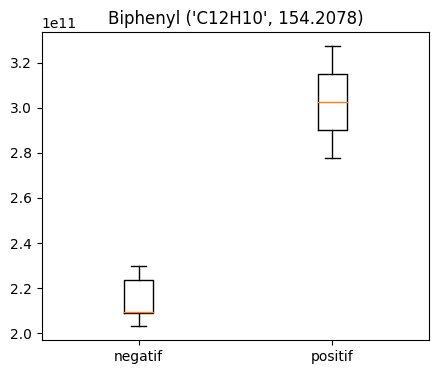

In [9]:
key = group_dict_name['neg_vs_posi']
print(key)
neg_vs_posi_mol = find_biom.filter_molecules_by_p_value_2(mol_list, mol_data_list, mode=key, p_value_thresold=p_value_thresold, plot=show) 

## MoI

In [10]:
mol_dict = utils.unique_mol_list_formla_weight_dict([neg_vs_posi_f_plus_posi_mol, neg_plus_posi_f_vs_posi_mol, neg_vs_posi_f_vs_posi_mol, neg_vs_posi_mol])

Negatif vs (Positif Faible + Postif) molecules

In [11]:
utils.retrieve_mol_list_formula_weight(neg_vs_posi_f_plus_posi_mol, mol_dict)

[('Hexanal', 'C6H12O', 100.1589),
 ('Cyclopentanone, 2-methyl-', 'C6H10O', 98.143),
 ('Pentane', 'C5H12', 72.1488),
 ('Ethanol', 'C2H6O', 46.0684),
 ('o-Hydroxybiphenyl', 'C12H10O', 170.2072),
 ('1-Octen-3-one', 'C8H14O', 126.1962),
 ('Benzenemethanol, α,α-dimethyl-', 'C9H12O', 136.191),
 ('3-Octanone', 'C8H16O', 128.212),
 ('Phenol, 2,6-bis(1,1-dimethylethyl)-4-ethyl-', 'C16H26O', 234.377),
 ('3-Hexanol, 5-methyl-', 'C7H16O', 116.2013),
 ('1-Penten-3-one', 'C5H8O', 84.1164),
 ('Benzene, n-butyl-', 'C10H14', 134.2182),
 ('2-Dodecanone', 'C12H24O', 184.3184),
 ('1-Undecanol', 'C11H24O', 172.3077),
 ('1-Butanone, 1-phenyl-', 'C10H12O', 148.2017),
 ('4,6-di-tert-Butyl-m-cresol', 'C15H24O', 220.3505),
 ('1,2-Naphthalenedione', 'C10H6O2', 158.1534),
 ('Phenol', 'C6H6O', 94.1112),
 ('Benzophenone', 'C13H10O', 182.2179),
 ('Methyl isocyanide', 'C2H3N', 41.0519),
 ('2-Propen-1-one, 1,3-diphenyl-, (E)-', 'C15H12O', 208.2552),
 ("4-(4'-Hydroxyphenoxy)biphenyl", '', '')]

(Negatif + Positif Faible) vs + Postif molecules

In [12]:
utils.retrieve_mol_list_formula_weight(neg_plus_posi_f_vs_posi_mol, mol_dict)

[('Cyclohexasiloxane, dodecamethyl-', 'C12H36O6Si6', 444.9236),
 ('Heptanal', 'C7H14O', 114.1855),
 ('Hexanal', 'C6H12O', 100.1589),
 ('Benzoic acid, phenyl ester', 'C13H10O2', 198.2173),
 ('Pentanal', 'C5H10O', 86.1323),
 ('Tetradecane', 'C14H30', 198.388),
 ('Alternariol monomethyl ether, 2TMS derivative', '', ''),
 ('2-Octen-1-ol, (E)-', 'C8H16O', 128.212),
 ('Cyclohexasiloxane, dodecamethyl-', 'C12H36O6Si6', 444.9236),
 ('Benzoic acid, ethyl ester', 'C9H10O2', 150.1745),
 ('Benzofuran-4-carbonitrile', '', ''),
 ('Dibenzo-p-dioxin', 'C12H8O2', 184.1907),
 ('2-Dodecanone', 'C12H24O', 184.3184),
 ('Formamide, N,N-dimethyl-', 'C3H7NO', 73.0938),
 ('Pentane, 2,3,4-trimethyl-', 'C8H18', 114.2285),
 ('cis-2,3-Epoxy-4S-(hydroxymethyl)-isophorone', '', ''),
 ('4-Cyclopropylcarbonyloxytridecane', '', ''),
 ('3-Benzoylmethyl-3-hydroxy-5-nitro-2-indolinone', '', ''),
 ('Biphenyl', 'C12H10', 154.2078)]

Negatif vs Positif Faible vs Postif molecules

In [13]:
utils.retrieve_mol_list_formula_weight(neg_vs_posi_f_vs_posi_mol, mol_dict)

[('Cyclohexasiloxane, dodecamethyl-', 'C12H36O6Si6', 444.9236),
 ('1-Dodecanol', 'C12H26O', 186.3342),
 ('Alternariol monomethyl ether, 2TMS derivative', '', ''),
 ('Ethanol', 'C2H6O', 46.0684),
 ('o-Hydroxybiphenyl', 'C12H10O', 170.2072),
 ('1-Octen-3-one', 'C8H14O', 126.1962),
 ('1-Hepten-3-one', 'C7H12O', 112.1696),
 ('Phenol, 2,6-bis(1,1-dimethylethyl)-4-ethyl-', 'C16H26O', 234.377),
 ('1-Penten-3-one', 'C5H8O', 84.1164),
 ('2-Dodecanone', 'C12H24O', 184.3184),
 ('1,4-Pentadiene', 'C5H8', 68.117),
 ('1-Undecanol', 'C11H24O', 172.3077),
 ('1,2-Naphthalenedione', 'C10H6O2', 158.1534),
 ('Phenol', 'C6H6O', 94.1112),
 ('Benzophenone', 'C13H10O', 182.2179),
 ('2-Propen-1-one, 1,3-diphenyl-, (E)-', 'C15H12O', 208.2552)]

Negatif vs Postif molecules (No Positif Faible)

In [14]:
utils.retrieve_mol_list_formula_weight(neg_vs_posi_mol, mol_dict)

[('Cyclohexasiloxane, dodecamethyl-', 'C12H36O6Si6', 444.9236),
 ('Benzoic acid, phenyl ester', 'C13H10O2', 198.2173),
 ('Pentanal', 'C5H10O', 86.1323),
 ('Alternariol monomethyl ether, 2TMS derivative', '', ''),
 ('2-Octen-1-ol, (E)-', 'C8H16O', 128.212),
 ('3-Hexanol, 5-methyl-', 'C7H16O', 116.2013),
 ('2-Dodecanone', 'C12H24O', 184.3184),
 ('Pentane, 2,3,4-trimethyl-', 'C8H18', 114.2285),
 ('cis-2,3-Epoxy-4S-(hydroxymethyl)-isophorone', '', ''),
 ('4,6-di-tert-Butyl-m-cresol', 'C15H24O', 220.3505),
 ('4-Cyclopropylcarbonyloxytridecane', '', ''),
 ('Phenol', 'C6H6O', 94.1112),
 ('Benzophenone', 'C13H10O', 182.2179),
 ('Biphenyl', 'C12H10', 154.2078)]

# Multivariate

In [172]:
# build feature list
features = find_biom.compute_sample_features(PEAK_TABLE_PATH)
len(features), len(features[0])

(10, 415)

## ACP

### 2D ACP

In [173]:
features_new_cd, pca = find_biom.acp(features)

[0.45277623 0.18947127] [1.03054555e+13 6.66648737e+12]


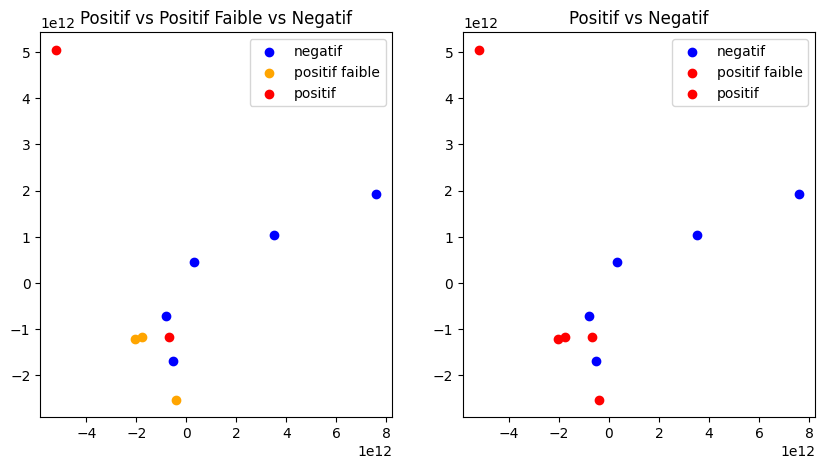

In [174]:
plot.plot_acp(features_new_cd, labels)

In [175]:
most_important_features = find_biom.pca_most_important_features(pca, mol_list, id_max=10)
print(most_important_features)

[['Cyclotrisiloxane, hexamethyl-' 'Benzonitrile'
  'Cyclotetrasiloxane, octamethyl-' 'Dibenzofuran' 'Benzaldehyde'
  '1,3,5,7-Cyclooctatetraene' 'Cyclohexasiloxane, dodecamethyl-'
  'n-Hexane' '1-Nonene' 'Nonanal']
 ['1,3,5,7-Cyclooctatetraene' 'Benzaldehyde' 'Dibenzofuran'
  'Cyclotetrasiloxane, octamethyl-' 'Benzonitrile'
  'Cyclotrisiloxane, hexamethyl-' '1-Nonene' 'Nonanal'
  'Cyclohexasiloxane, dodecamethyl-' 'n-Hexane']]


### 3D ACP

In [176]:
features_new_cd, pca = find_biom.acp(features, n_components=3)

[0.45277623 0.18947127 0.14487323] [1.03054555e+13 6.66648737e+12 5.82934092e+12]


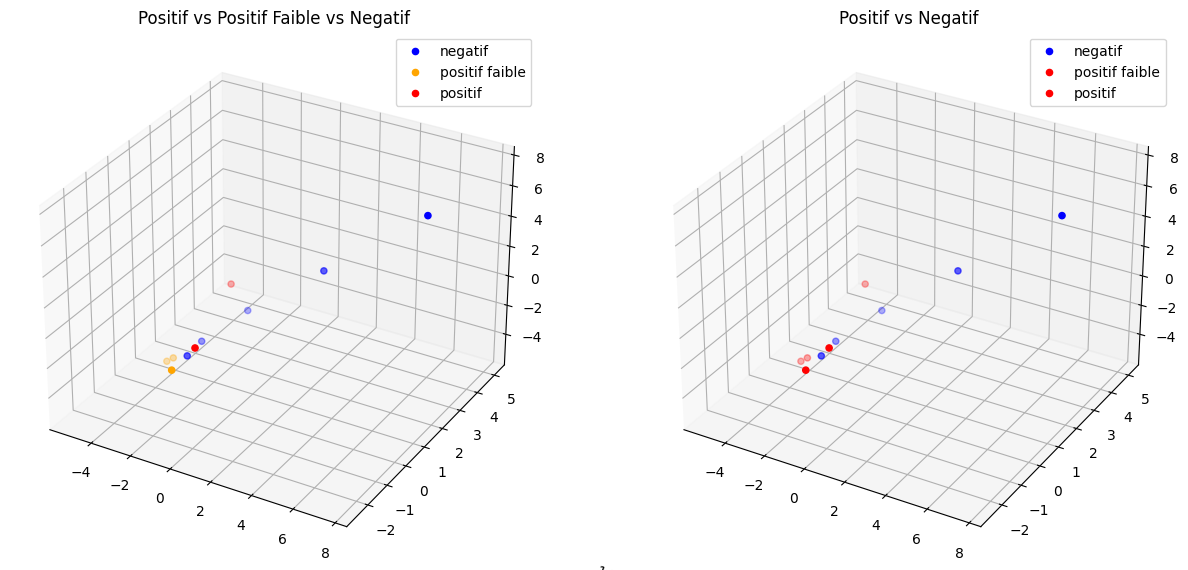

In [177]:
plot.plot_acp(features_new_cd, labels, projection="3d", figsize=(15,15))

### ACP on Negatif vs (Positif Faible + Positif) molecules

In [178]:
neg_vs_posi_f_plus_posi_mol

['Hexanal',
 'Cyclopentanone, 2-methyl-',
 'Pentane',
 'Ethanol',
 'o-Hydroxybiphenyl',
 '1-Octen-3-one',
 'Benzenemethanol, α,α-dimethyl-',
 '3-Octanone',
 'Phenol, 2,6-bis(1,1-dimethylethyl)-4-ethyl-',
 '3-Hexanol, 5-methyl-',
 '1-Penten-3-one',
 'Benzene, n-butyl-',
 '2-Dodecanone',
 '1-Undecanol',
 '1-Butanone, 1-phenyl-',
 '4,6-di-tert-Butyl-m-cresol',
 '1,2-Naphthalenedione',
 'Phenol',
 'Benzophenone',
 'Methyl isocyanide',
 '2-Propen-1-one, 1,3-diphenyl-, (E)-',
 "4-(4'-Hydroxyphenoxy)biphenyl"]

In [179]:
features_disc_mol = find_biom.compute_sample_features_filter_by_disc_mol(PEAK_TABLE_PATH, neg_vs_posi_f_plus_posi_mol)
features_disc_mol.shape

(10, 24)

[0.53258283 0.28226956] [6.18368655e+12 4.50179703e+12]


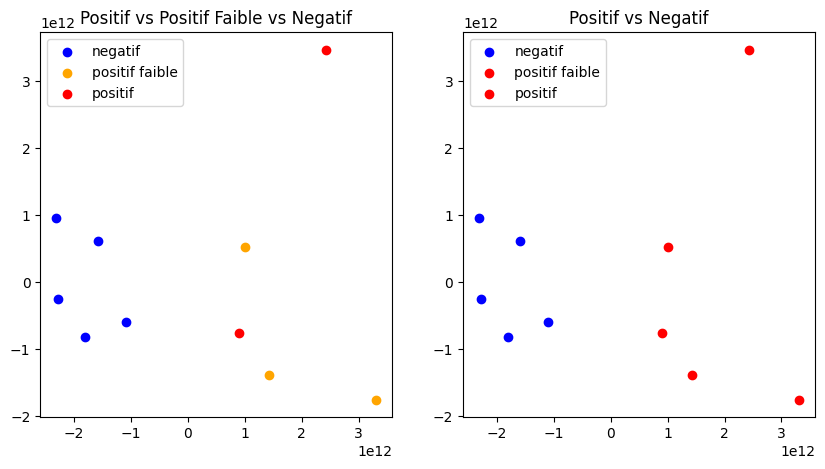

In [180]:
features_disc_mol_new_cd, pca_disc_mol = find_biom.acp(features_disc_mol)
plot.plot_acp(features_disc_mol_new_cd, labels)

In [181]:
most_important_features = find_biom.pca_most_important_features(pca_disc_mol, mol_list, id_max=10)
print(most_important_features)

[['Benzaldehyde' 'n-Hexane' 'Cyclotrisiloxane, hexamethyl-'
  'Benzonitrile' 'Cyclotetrasiloxane, octamethyl-'
  '1,3,5,7-Cyclooctatetraene' '1-Nonene'
  'Cyclohexasiloxane, dodecamethyl-' 'Dibenzofuran' 'Nonanal']
 ['Benzaldehyde' 'n-Hexane' '1-Nonene' 'Cyclotrisiloxane, hexamethyl-'
  'Cyclotetrasiloxane, octamethyl-' 'Cyclohexasiloxane, dodecamethyl-'
  'Benzonitrile' 'Dibenzofuran' '1,3,5,7-Cyclooctatetraene' 'Nonanal']]


## All features

### Random Forest

In [182]:
clf_rfc = RandomForestClassifier(random_state=0, n_estimators=5, max_depth=3)
clf_rfc.fit(features, y=[labels_dict[label] for label in labels])

RandomForestClassifier(max_depth=3, n_estimators=5, random_state=0)

Feature importance

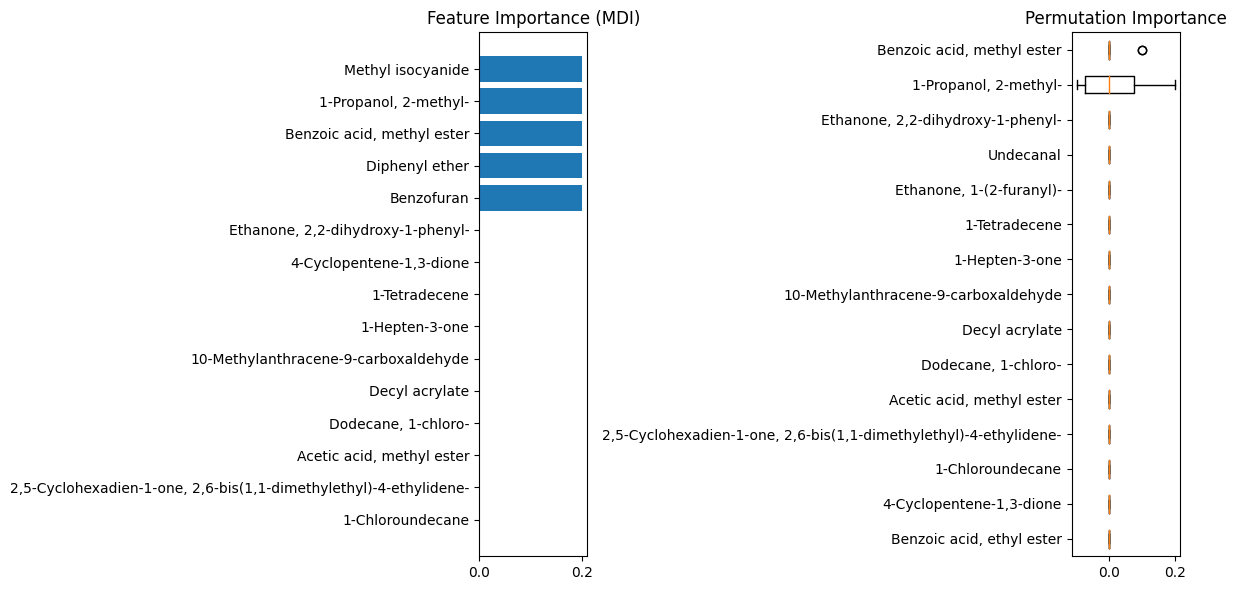

In [183]:
permutation_importance_rfc = permutation_importance(
    clf_rfc,features, y=[labels_dict[label] for label in labels], n_repeats=10, random_state=42, n_jobs=2
)
plot.plot_feature_and_permutation_importance(clf_rfc.feature_importances_, permutation_importance_rfc, mol_list, id_max=15)

Validation on train set

In [184]:
clf_rfc.score(features, y=[labels_dict[label] for label in labels])

0.8

Cross validation

In [185]:
scores = cross_val_score(clf_rfc, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores))

0.4


Confusion matrix

In [186]:
pred = cross_val_predict(clf_rfc, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())

In [187]:
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
tn, fp, fn, tp = conf_mat.ravel()
tn, fp, fn, tp

(2, 3, 3, 2)

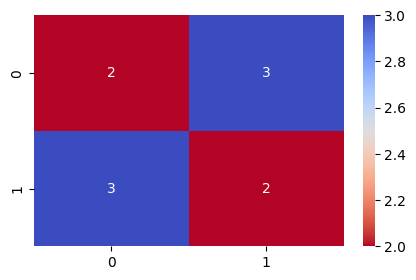

In [188]:
plot.plot_confusion_matrix(conf_mat)

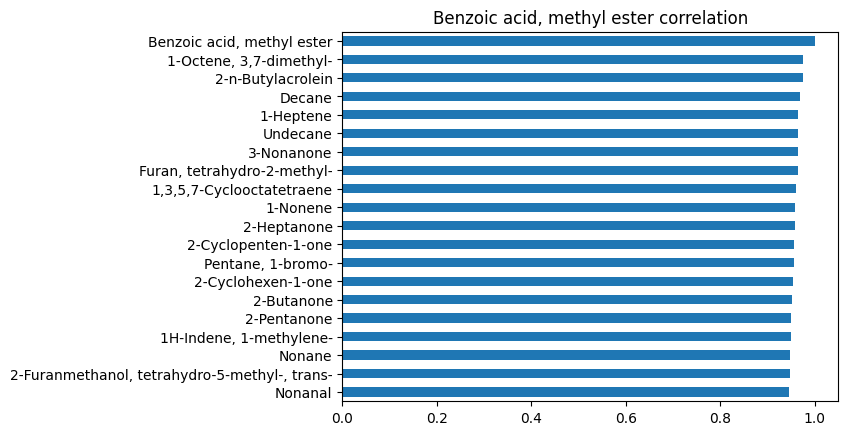

In [189]:
corr_matrix = np.corrcoef(np.transpose(features))
plot.plot_feature_corr("Benzoic acid, methyl ester", corr_matrix, mol_list)

### GradientBoostingClassifier

With fit(features) we have only Benzophenone. We can try to remove it from "features".

In [190]:
# remove Benzophenone
mol_list[372]
features_without_benzophenone = np.array(features.copy())
features_without_benzophenone[:, np.argwhere(mol_list == 'Benzophenone')[0][0]] = 0

In [191]:
clf_gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=1,random_state=0).fit(features_without_benzophenone, y=[labels_dict[label] for label in labels])

Feature importance

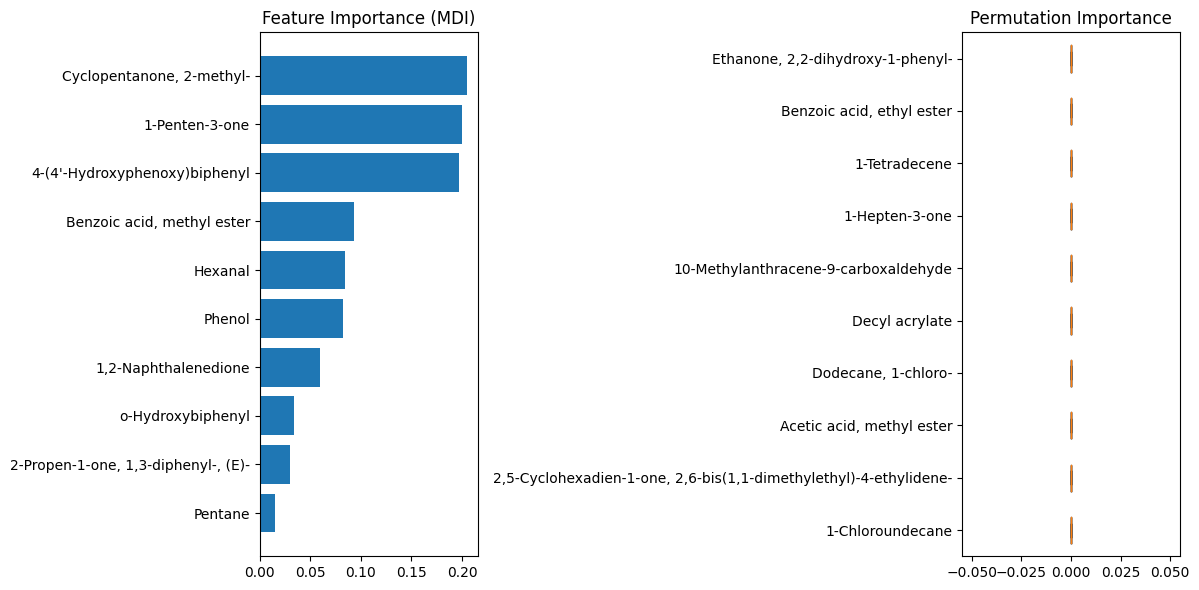

In [192]:
permutation_importance_gbc = permutation_importance(
    clf_gbc,features, y=[labels_dict[label] for label in labels], n_repeats=10, random_state=42, n_jobs=2
)
plot.plot_feature_and_permutation_importance(clf_gbc.feature_importances_, permutation_importance_gbc, mol_list)

Validation on train set

In [193]:
clf_gbc.score(features_without_benzophenone, y=[labels_dict[label] for label in labels])

1.0

Cross-Validation

In [194]:
scores_gbc = cross_val_score(clf_gbc, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(scores_gbc)
print(np.mean(scores_gbc))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.1


Confusion matrix

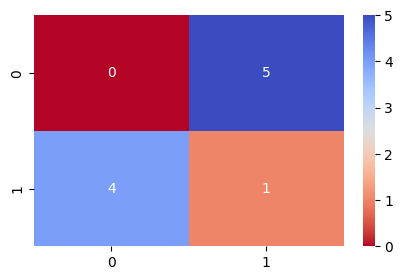

In [196]:
pred = cross_val_predict(clf_gbc, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

### Logistic Regression

In [197]:
clf_lr = LogisticRegression(random_state=0).fit(features, y=[labels_dict[label] for label in labels])

Feature importance

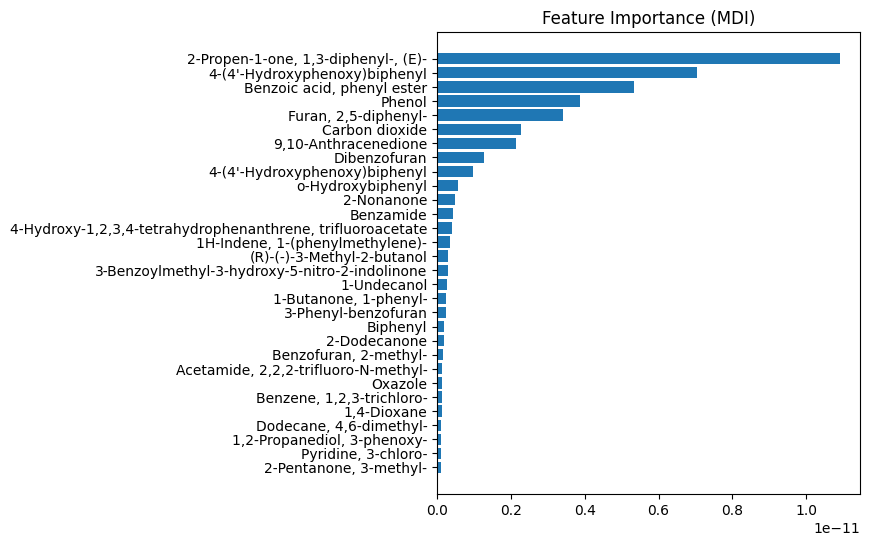

In [198]:
plot.plot_feature_importance(clf_lr.coef_[0], mol_list, 30)

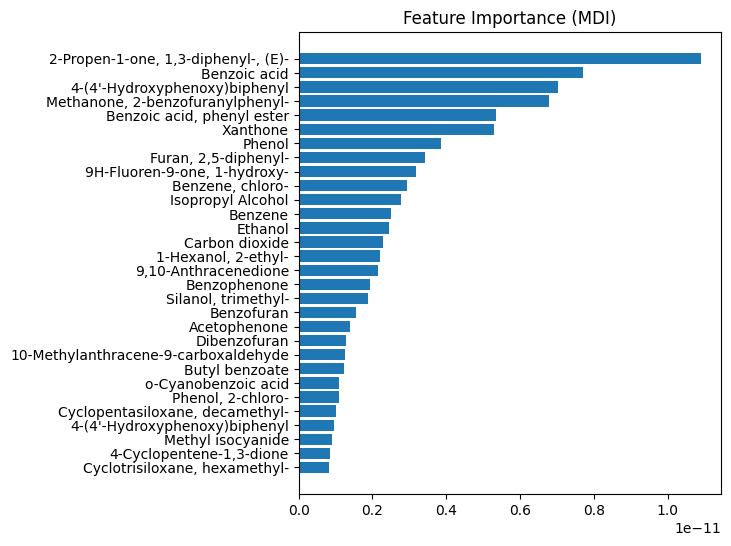

In [199]:
plot.plot_feature_importance(np.abs(clf_lr.coef_[0]), mol_list, 30)

Validation on train set

In [200]:
clf_lr.score(features, y=[labels_dict[label] for label in labels])

1.0

Cross-Validation

In [201]:
scores_lr = cross_val_score(clf_lr, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores_lr))

0.4


lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver optio

Confusion matrix

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver optio

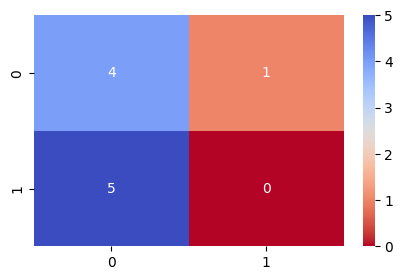

In [202]:
pred = cross_val_predict(clf_lr, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

### LASSO

Default solver is 'lbfgs' but "For small datasets, ‘liblinear’ is a good choice, whereas 'sag' and 'saga' are faster for large ones;" and the default solver do not handle l1 penalty.
 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [206]:
#clf_lasso = linear_model.Lasso(alpha=0.1).fit(features, y=[labels_dict[label] for label in labels])
# Logisctic Regression with l1 penalty
clf_lasso = LogisticRegression(random_state=0, penalty='l1', solver='saga').fit(features, y=[labels_dict[label] for label in labels])

The max_iter was reached which means the coef_ did not converge


Feature importance

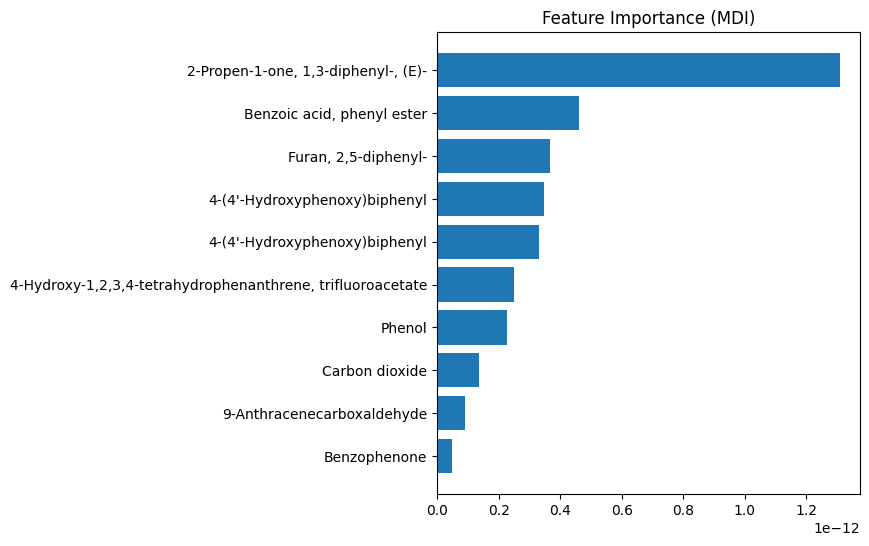

In [207]:
plot.plot_feature_importance(clf_lasso.coef_[0], mol_list)

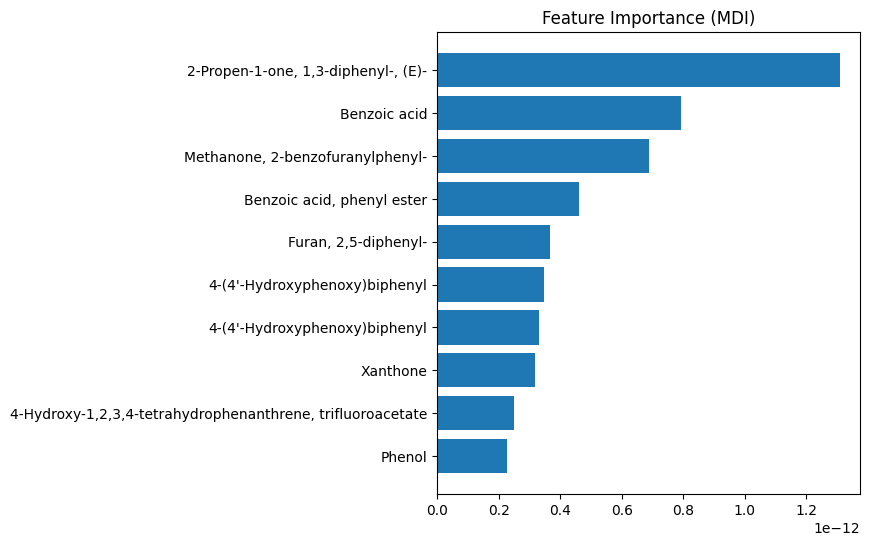

In [208]:
plot.plot_feature_importance(np.abs(clf_lasso.coef_[0]), mol_list)

Validation on train set

In [209]:
clf_lasso.score(features, y=[labels_dict[label] for label in labels])

1.0

Cross-Validation

In [210]:
scores_lasso = cross_val_score(clf_lasso, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores_lasso))

0.7


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


Confusion matrix

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


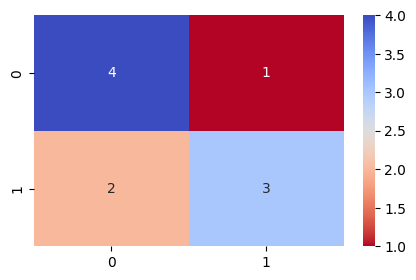

In [211]:
pred = cross_val_predict(clf_lasso, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

### Ridge

In [212]:
# LogisticRegression with l2 penaly
clf_rc = RidgeClassifier().fit(features, y=[labels_dict[label] for label in labels])

Singular matrix in solving dual problem. Using least-squares solution instead.


In [213]:
clf_rc.score(features, y=[labels_dict[label] for label in labels])

1.0

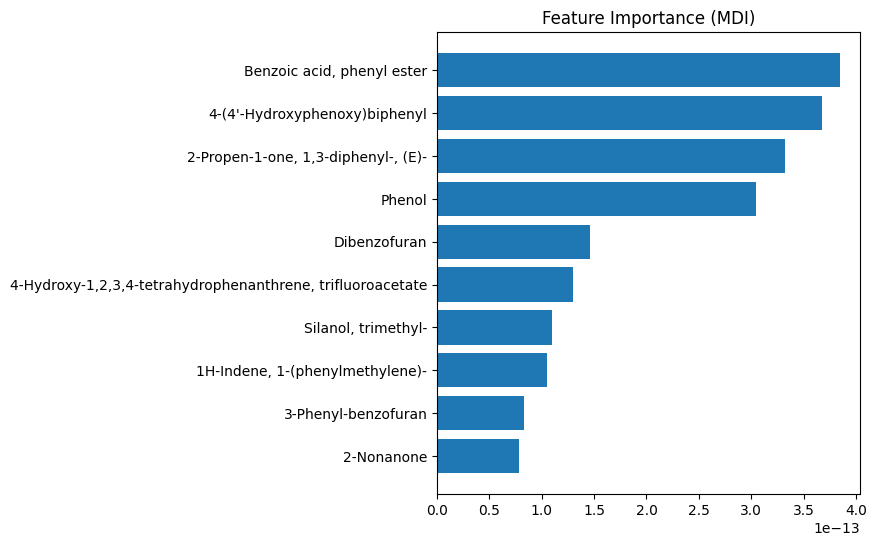

In [214]:
plot.plot_feature_importance(clf_rc.coef_[0], mol_list)

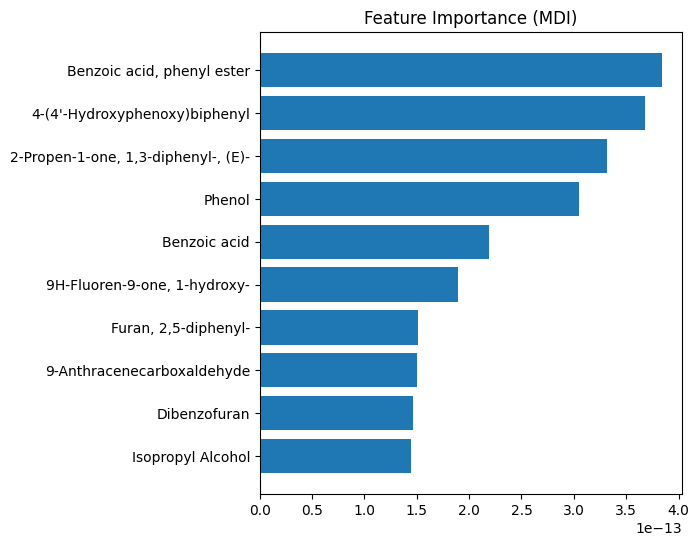

In [215]:
plot.plot_feature_importance(np.abs(clf_rc.coef_[0]), mol_list)

In [216]:
scores_rc = cross_val_score(clf_rc, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores_rc))

0.7


Ill-conditioned matrix (rcond=3.36737e-17): result may not be accurate.
Ill-conditioned matrix (rcond=4.41443e-18): result may not be accurate.
Singular matrix in solving dual problem. Using least-squares solution instead.
Singular matrix in solving dual problem. Using least-squares solution instead.
Ill-conditioned matrix (rcond=7.99867e-17): result may not be accurate.
Singular matrix in solving dual problem. Using least-squares solution instead.
Ill-conditioned matrix (rcond=2.98718e-17): result may not be accurate.
Singular matrix in solving dual problem. Using least-squares solution instead.
Singular matrix in solving dual problem. Using least-squares solution instead.
Singular matrix in solving dual problem. Using least-squares solution instead.


Ill-conditioned matrix (rcond=3.36737e-17): result may not be accurate.
Ill-conditioned matrix (rcond=4.41443e-18): result may not be accurate.
Singular matrix in solving dual problem. Using least-squares solution instead.
Singular matrix in solving dual problem. Using least-squares solution instead.
Ill-conditioned matrix (rcond=7.99867e-17): result may not be accurate.
Singular matrix in solving dual problem. Using least-squares solution instead.
Ill-conditioned matrix (rcond=2.98718e-17): result may not be accurate.
Singular matrix in solving dual problem. Using least-squares solution instead.
Singular matrix in solving dual problem. Using least-squares solution instead.
Singular matrix in solving dual problem. Using least-squares solution instead.


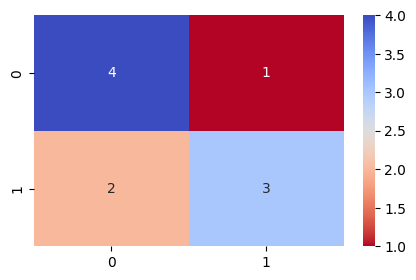

In [217]:
pred = cross_val_predict(clf_rc, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

### LogisticRegression ElasticNet

In [218]:
clf_nc = LogisticRegression(random_state=0, solver='saga', l1_ratio=0.7, penalty='elasticnet').fit(features, y=[labels_dict[label] for label in labels])

The max_iter was reached which means the coef_ did not converge


In [219]:
scores_nc = cross_val_score(clf_nc, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores_nc))

0.7


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


### SVM

In [220]:
clf_linear_svc = svm.LinearSVC()
clf_linear_svc.fit(features, y=[labels_dict[label] for label in labels])

LinearSVC()

Feature importance

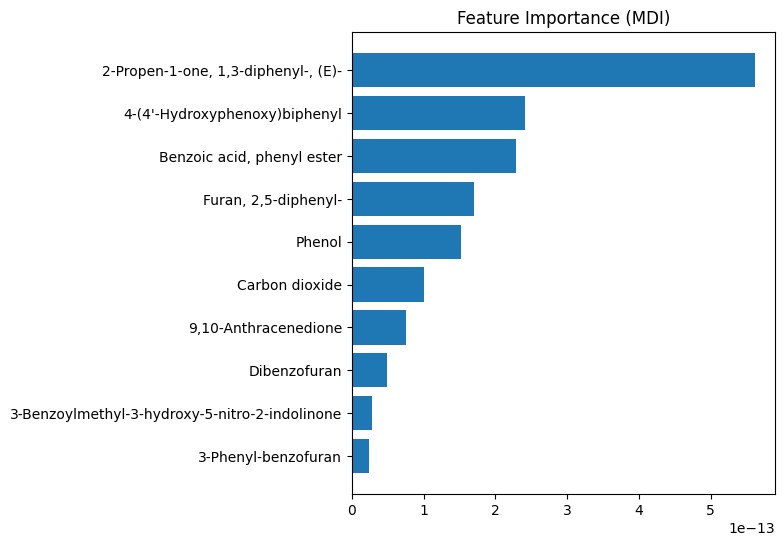

In [221]:
plot.plot_feature_importance(clf_linear_svc.coef_[0], mol_list)

Validation on train set

In [222]:
clf_linear_svc.score(features, y=[labels_dict[label] for label in labels])

1.0

Cross-Validation

In [223]:
scores_linear_svc = cross_val_score(clf_linear_svc, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores_linear_svc))

0.7


In [224]:
labels

array(['positif faible', 'positif', 'negatif', 'negatif', 'negatif',
       'positif', 'negatif', 'positif faible', 'positif faible',
       'negatif'], dtype=object)

The score is always 0 when one of the positives is not used for training but for validation

In [225]:
scores_linear_svc

array([1., 0., 1., 1., 1., 0., 0., 1., 1., 1.])

Confusion matrix

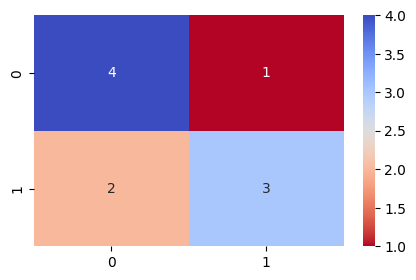

In [226]:
pred = cross_val_predict(clf_linear_svc, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

## With neg_vs_posi_f_plus_posi_mol molecules

In [227]:
neg_vs_posi_f_plus_posi_mol, len(neg_vs_posi_f_plus_posi_mol)

(['Hexanal',
  'Cyclopentanone, 2-methyl-',
  'Pentane',
  'Ethanol',
  'o-Hydroxybiphenyl',
  '1-Octen-3-one',
  'Benzenemethanol, α,α-dimethyl-',
  '3-Octanone',
  'Phenol, 2,6-bis(1,1-dimethylethyl)-4-ethyl-',
  '3-Hexanol, 5-methyl-',
  '1-Penten-3-one',
  'Benzene, n-butyl-',
  '2-Dodecanone',
  '1-Undecanol',
  '1-Butanone, 1-phenyl-',
  '4,6-di-tert-Butyl-m-cresol',
  '1,2-Naphthalenedione',
  'Phenol',
  'Benzophenone',
  'Methyl isocyanide',
  '2-Propen-1-one, 1,3-diphenyl-, (E)-',
  "4-(4'-Hydroxyphenoxy)biphenyl"],
 22)

In [228]:
features_disc_mol, ordered_mol_list = find_biom.compute_sample_features_filter_by_disc_mol_ordered(PEAK_TABLE_PATH, neg_vs_posi_f_plus_posi_mol)
features_disc_mol.shape, ordered_mol_list.shape

((10, 24), (24,))

### Random Forest Classifier

In [229]:
clf_rfc_disc_mol = RandomForestClassifier(random_state=0)
clf_rfc_disc_mol.fit(features_disc_mol, y=[labels_dict[label] for label in labels])

RandomForestClassifier(random_state=0)

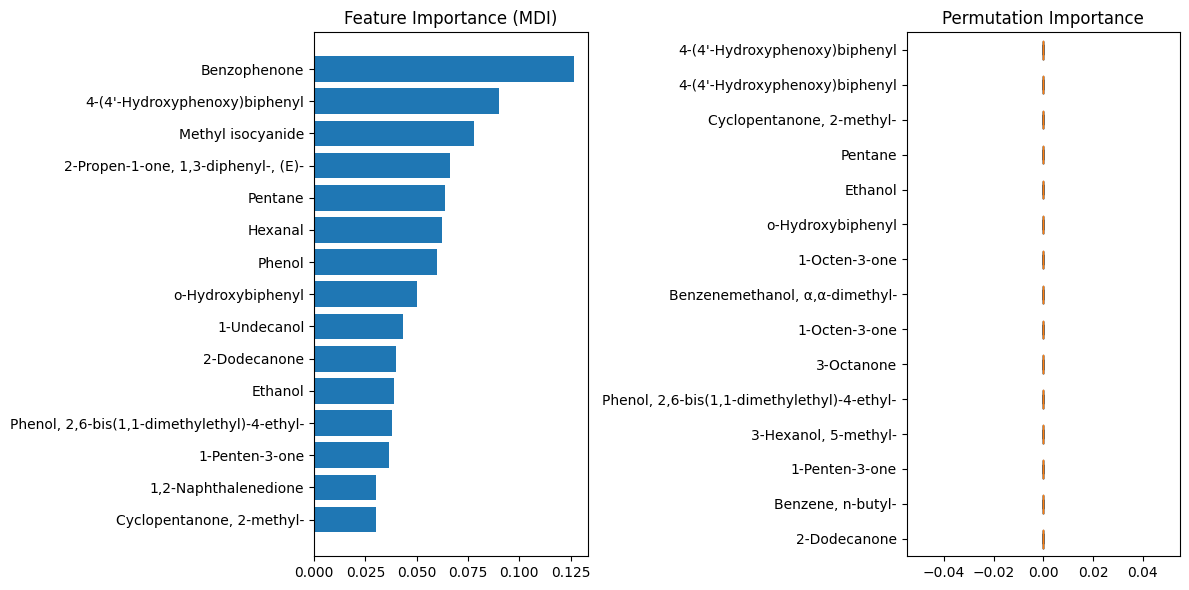

In [230]:
permutation_importance_rfc_disc_mol = permutation_importance(
    clf_rfc_disc_mol, features_disc_mol, y=[labels_dict[label] for label in labels], n_repeats=10, random_state=42, n_jobs=2
)
plot.plot_feature_and_permutation_importance(clf_rfc_disc_mol.feature_importances_, permutation_importance_rfc_disc_mol, ordered_mol_list, id_max=15)

In [231]:
scores = cross_val_score(clf_rfc_disc_mol, features_disc_mol, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores))

0.9


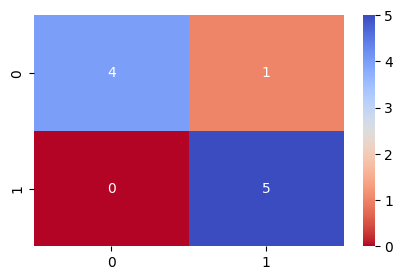

In [232]:
pred = cross_val_predict(clf_rfc_disc_mol, features_disc_mol, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

### Logistic Regression

In [233]:
clf_lr_disc_mol = LogisticRegression(random_state=0).fit(features_disc_mol, y=[labels_dict[label] for label in labels])

In [234]:
scores_lr_disc_mol = cross_val_score(clf_lr_disc_mol, features_disc_mol, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores_lr_disc_mol))

0.7


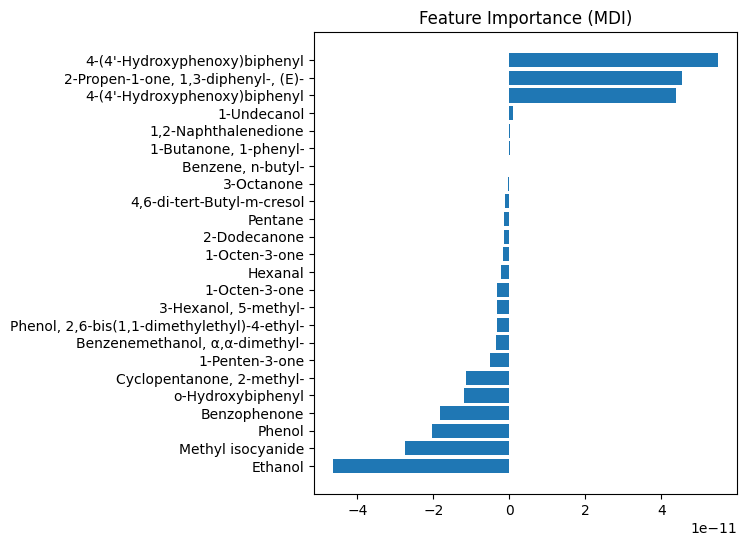

In [235]:
plot.plot_feature_importance((clf_lr_disc_mol.coef_[0]), ordered_mol_list, 30)

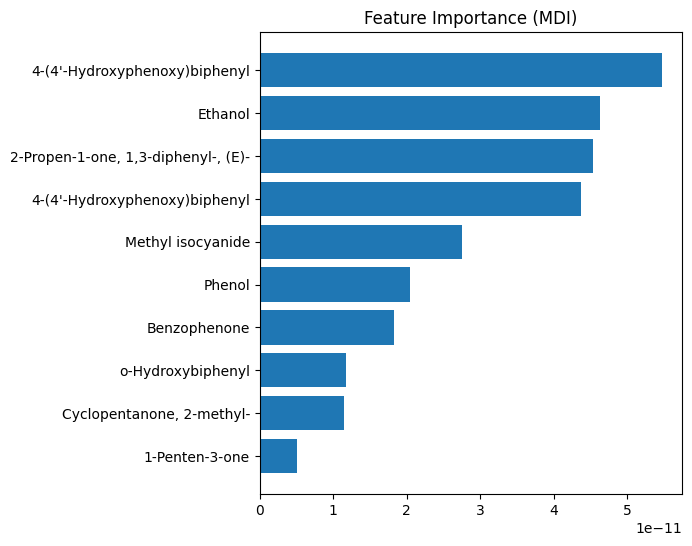

In [236]:
plot.plot_feature_importance(np.abs(clf_lr_disc_mol.coef_[0]), ordered_mol_list)

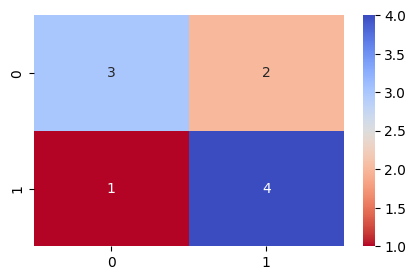

In [237]:
pred = cross_val_predict(clf_lr_disc_mol, features_disc_mol, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

### LASSO

In [238]:
#clf_lasso_disc_mol = linear_model.Lasso(alpha=0.1).fit(features_disc_mol, y=[labels_dict[label] for label in labels])
clf_lasso_disc_mol = LogisticRegression(random_state=0, penalty='l1', solver='saga').fit(features_disc_mol, y=[labels_dict[label] for label in labels])

The max_iter was reached which means the coef_ did not converge


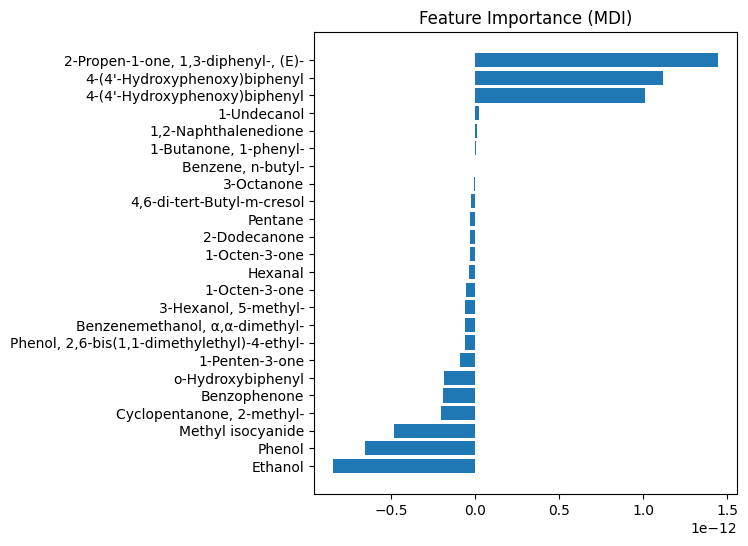

In [239]:
plot.plot_feature_importance(clf_lasso_disc_mol.coef_[0], ordered_mol_list, 30)

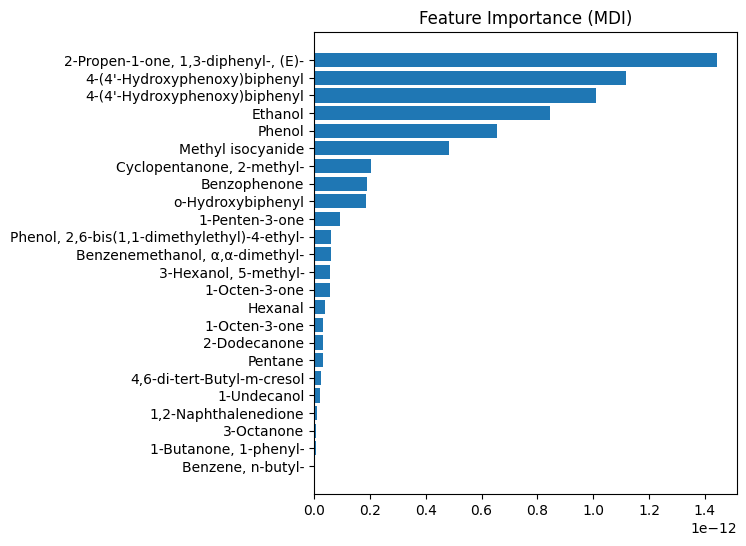

In [240]:
plot.plot_feature_importance(np.abs(clf_lasso_disc_mol.coef_[0]), ordered_mol_list, 30)

In [241]:
scores_lasso_disc_mol = cross_val_score(clf_lasso_disc_mol, features_disc_mol, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores_lasso_disc_mol))

0.8


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


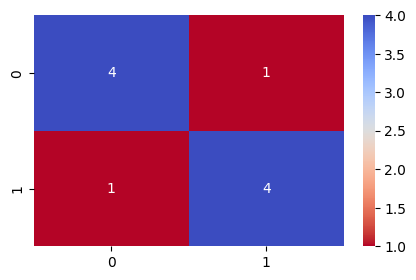

In [242]:
pred = cross_val_predict(clf_lasso_disc_mol, features_disc_mol, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

### Ridge

In [243]:
clf_rc_disc_mol = RidgeClassifier().fit(features_disc_mol, y=[labels_dict[label] for label in labels])

Singular matrix in solving dual problem. Using least-squares solution instead.


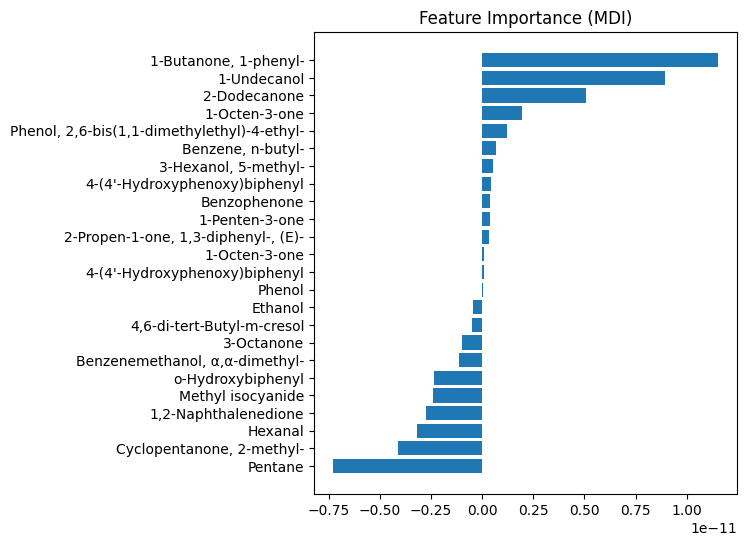

In [244]:
plot.plot_feature_importance(clf_rc_disc_mol.coef_[0], ordered_mol_list, 25)

In [245]:
scores_rc_disc_mol = cross_val_score(clf_rc_disc_mol, features_disc_mol, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores_rc_disc_mol))

0.6


Singular matrix in solving dual problem. Using least-squares solution instead.
Singular matrix in solving dual problem. Using least-squares solution instead.
Singular matrix in solving dual problem. Using least-squares solution instead.
Singular matrix in solving dual problem. Using least-squares solution instead.
Ill-conditioned matrix (rcond=8.85323e-18): result may not be accurate.
Ill-conditioned matrix (rcond=4.88055e-18): result may not be accurate.
Ill-conditioned matrix (rcond=1.89994e-17): result may not be accurate.
Ill-conditioned matrix (rcond=5.492e-18): result may not be accurate.
Ill-conditioned matrix (rcond=1.36217e-17): result may not be accurate.
Ill-conditioned matrix (rcond=2.24704e-17): result may not be accurate.


Singular matrix in solving dual problem. Using least-squares solution instead.
Singular matrix in solving dual problem. Using least-squares solution instead.
Singular matrix in solving dual problem. Using least-squares solution instead.
Singular matrix in solving dual problem. Using least-squares solution instead.
Ill-conditioned matrix (rcond=8.85323e-18): result may not be accurate.
Ill-conditioned matrix (rcond=4.88055e-18): result may not be accurate.
Ill-conditioned matrix (rcond=1.89994e-17): result may not be accurate.
Ill-conditioned matrix (rcond=5.492e-18): result may not be accurate.
Ill-conditioned matrix (rcond=1.36217e-17): result may not be accurate.
Ill-conditioned matrix (rcond=2.24704e-17): result may not be accurate.


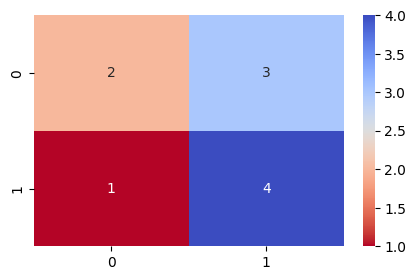

In [246]:
pred = cross_val_predict(clf_rc_disc_mol, features_disc_mol, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

### SVM

In [247]:
clf_linear_svc_disc_mol = svm.LinearSVC()
clf_linear_svc_disc_mol.fit(features_disc_mol, y=[labels_dict[label] for label in labels])

Liblinear failed to converge, increase the number of iterations.


LinearSVC()

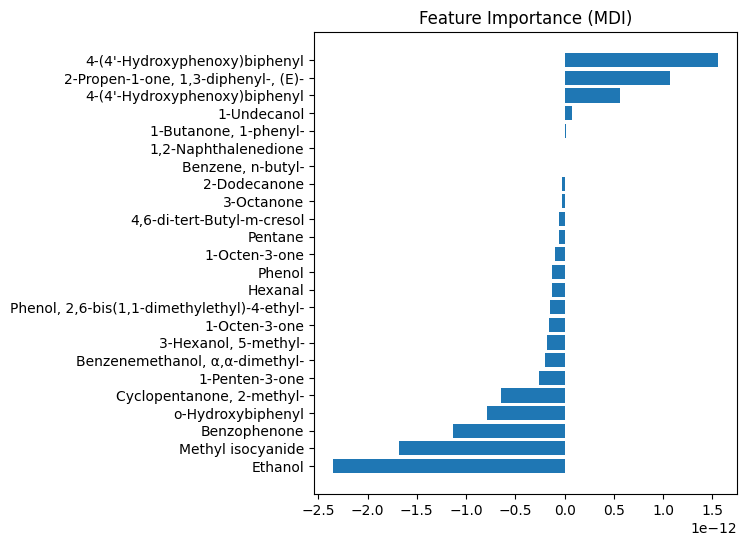

In [248]:
plot.plot_feature_importance(clf_linear_svc_disc_mol.coef_[0], ordered_mol_list, 40)

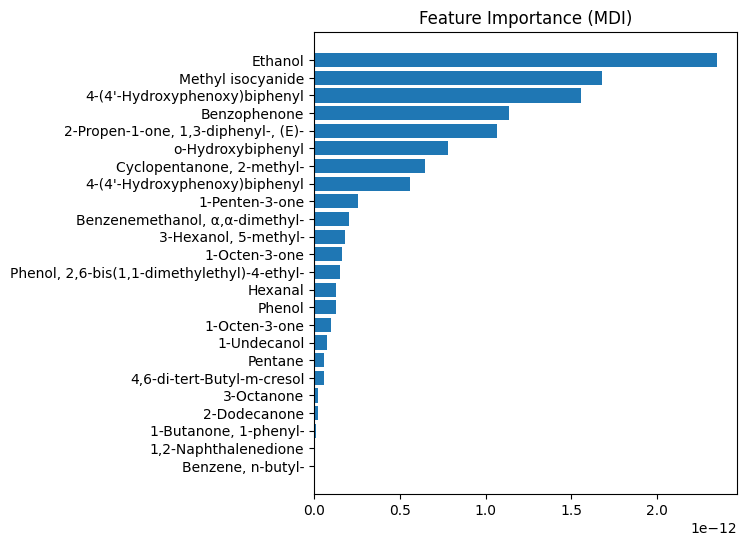

In [249]:
plot.plot_feature_importance(np.abs(clf_linear_svc_disc_mol.coef_[0]), ordered_mol_list, 40)

In [250]:
scores_linear_svc_disc_mol = cross_val_score(clf_linear_svc_disc_mol, features_disc_mol, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores_linear_svc_disc_mol))

0.7


Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.


Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.


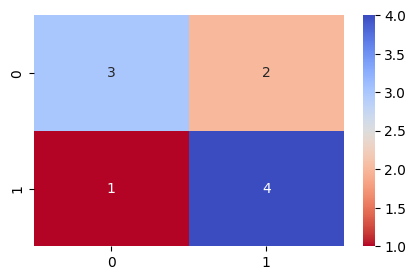

In [251]:
pred = cross_val_predict(clf_linear_svc_disc_mol, features_disc_mol, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

# Discriminant pixel approach

## Analyses disc pixels

### Pre-Processing

In [89]:
CORRECTED_CHROMA_PATH = 'C:/Users/Stan/pic/COVID/alignement/corrected_chromatos/aligned_positif_ref/'

FAUT CHANGER PAR 802111-P-M-01-158-split10.cdf car on a aligné par rapport à lui

In [90]:
chromato_ref_obj = read_chroma.read_chroma('F:/Bureau/032023-data-Tenax-VOC-COVID/801850-A-C-01-157-split10.cdf', 1.25)

In [91]:
chromato, time_rn, spectra_obj = chromato_ref_obj
full_spectra = mass_spec.read_full_spectra_centroid(spectra_obj=spectra_obj)
spectra, debuts, fins = full_spectra
chromato_cube = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra, spectra_obj=spectra_obj)

--- 319.2252585887909 seconds --- to compute full spectra centroid


In [92]:
chromato_cube = np.array(baseline_correction.chromato_cube_corrected_baseline(chromato_cube))

In [93]:
vij_posi_vs_other = np.ones(labels.shape)
vij_posi_vs_other[labels == 'negatif'] = -1
vij_posi_vs_other

array([ 1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1.])

In [94]:
aligned_chromatos = discriminant_pixel.read_aligned_chromatos(CORRECTED_CHROMA_PATH)
aligned_chromatos = np.array([baseline_correction.chromato_no_baseline(aligned_chromato) for aligned_chromato in aligned_chromatos])

In [95]:
discriminant_pixels = discriminant_pixel.find_discriminant_pixels(chromato_ref_obj, aligned_chromatos, vij_posi_vs_other, disp=False, max_pixel=500, local_max_filter=True)

In [252]:
features = np.array([chroma[discriminant_pixels[:, 0], discriminant_pixels[: , 1]] for chroma in aligned_chromatos])

In [253]:
matches = matching.matching_nist_lib_from_chromato_cube(chromato_ref_obj, chromato_cube, discriminant_pixels, mod_time = 1.25, match_factor_min=0)

Unable to parse the following character codes for string 2,6-Diphenyl-�-pyrone: [-25].
Unable to parse the following character codes for string 1(2H)-Naphthalenone, octahydro-2-hydroxy-4a,5-dimethyl-3-(1-methylethenyl)-, [2R-(2�,3�,4a�,5�,8a�)]-: [-32, -31, -31, -31, -31].
Unable to parse the following character codes for string �-Butenonitrile: [-31].
Unable to parse the following character codes for string 2-Phenyl-�-benzopyrone: [-25].
Unable to parse the following character codes for string (RS)-�-Heptalactone: [-25].
Unable to parse the following character codes for string (�)-4-n-Propylbutyrolactone: [-15].
Unable to parse the following character codes for string �-Heptanolactone: [-25].
Unable to parse the following character codes for string �-Heptalactone: [-25].
Unable to parse the following character codes for string �-Propiobutyrolactone: [-25].
Unable to parse the following character codes for string �-Propyl-�-butyrolactone: [-25, -25].
Unable to parse the following chara

nb peaks:
93


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Many of the peaks are not well identified. 0 with match factor > 800 ...

In [254]:
for match in matches:
    print(match[1]["casno"], match[1]["compound_name"], match[1]["compound_formula"], match[1]["hit_prob"], match[1]["match_factor"], match[1]["reverse_match_factor"])


1120-21-4 Undecane C11H24 20.21 776 923
17322-97-3 1,2-Epoxyundecane C11H22O 7.73 566 786
--- Licochalcone C, 2TMS (isomer 2) C27H38O4Si2 27.74 526 535
5651-60-5 Benz(d)indeno(1,2-b)pyran-5,11-dione C16H8O3 39.92 601 725
1487-18-9 2-Vinylfuran C6H6O 21.44 656 792
--- 2H-Pyrrol-2-one, 4-acetyl-5-(4-chlorophenyl)-1,5-dihydro-3-hydroxy-1-[2-(1H-imidazol-4-yl)ethyl]- C17H16ClN3O3 5.22 463 523
18720-66-6 3-Heptanol, 6-methyl- C8H18O 35.76 595 790
593-75-9 Methyl isocyanide C2H3N 13.72 365 868
--- Licochalcone C, 2TMS (isomer 2) C27H38O4Si2 19.47 500 523
55401-43-9 Pregn-5-en-18-oic acid, 3-[(5,5-dimethyl-3-oxo-1-cyclohexen-1-yl)amino]-20-hydroxy-, γ-lactone, (3α,20R)- C29H41NO3 32.72 516 547
589-98-0 3-Octanol C8H18O 42.12 638 861
53780-45-3 Diethyl bis(4-pivaloylbenzyl)malonate C31H40O6 24.0 506 531
124-19-6 Nonanal C9H18O 63.83 781 883
5410-22-0 7-Oxabicyclo[4.1.0]heptane, 2-methyl- C7H12O 7.56 454 774
525-82-6 Flavone C15H10O2 7.84 535 763
-131-72-2 4-Formyl-3,5-di-t-butylbenzoic acid C1

In [255]:
features_new_cd_disc_pix, pca_disc_pix = find_biom.acp(features, n_components=2)

[0.89045046 0.0472351 ] [25532805.2126575   5880660.05441102]


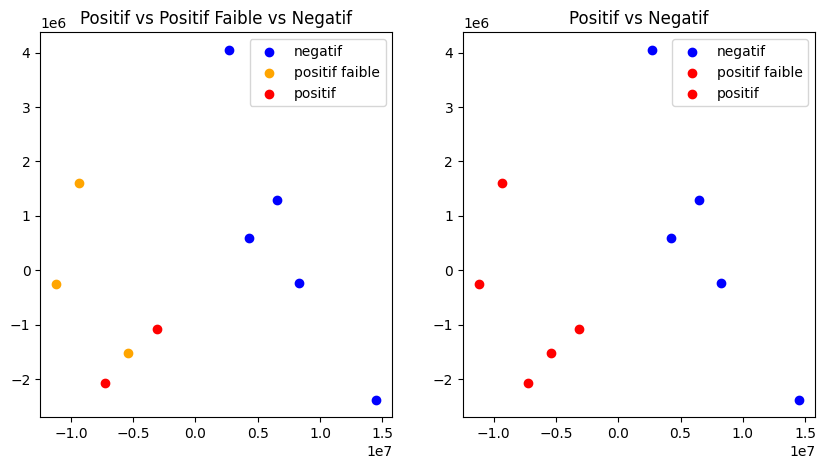

In [256]:
plot.plot_acp(features_new_cd_disc_pix, labels)

In [257]:
features_name = np.array([match[1]['compound_name'] for match in matches])

In [258]:
features.shape, features_name.shape

((10, 93), (93,))

### RandomForestClassifier

In [259]:
clf_rfc_disc_pixel = RandomForestClassifier(random_state=0)
clf_rfc_disc_pixel.fit(features, y=[labels_dict[label] for label in labels])

RandomForestClassifier(random_state=0)

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


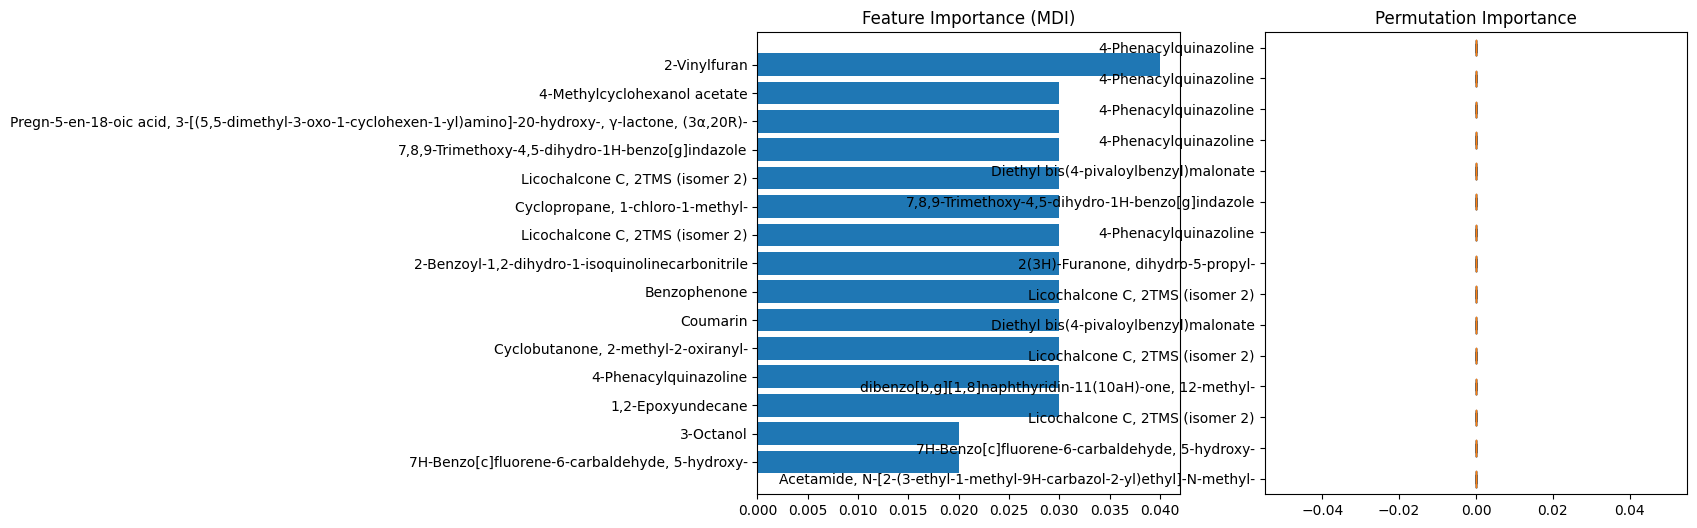

In [260]:
permutation_importance_rfc_disc = permutation_importance(
    clf_rfc_disc_pixel, features, y=[labels_dict[label] for label in labels], n_repeats=10, random_state=42, n_jobs=2
)
plot.plot_feature_and_permutation_importance(clf_rfc_disc_pixel.feature_importances_, permutation_importance_rfc_disc, features_name, id_max=15)

In [261]:
scores = cross_val_score(clf_rfc_disc_pixel, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores))

1.0


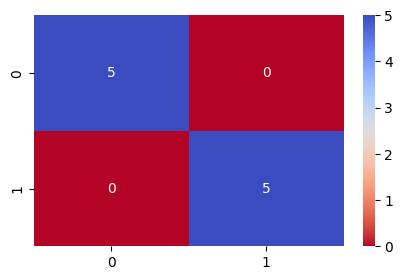

In [262]:
pred = cross_val_predict(clf_rfc_disc_pixel, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

### Logistic Regression

In [263]:
clf_lr_disc_pixel = LogisticRegression(random_state=0).fit(features, y=[labels_dict[label] for label in labels])

In [264]:
scores_lr_disc_pixel = cross_val_score(clf_lr_disc_pixel, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores_lr_disc_pixel))

0.9


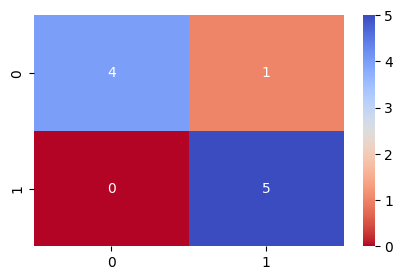

In [265]:
pred = cross_val_predict(clf_lr_disc_pixel, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

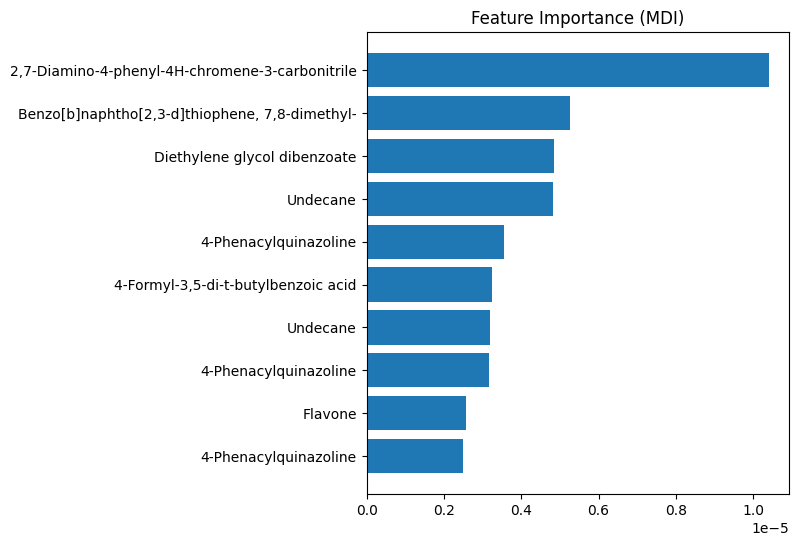

In [266]:
plot.plot_feature_importance(clf_lr_disc_pixel.coef_[0], features_name)

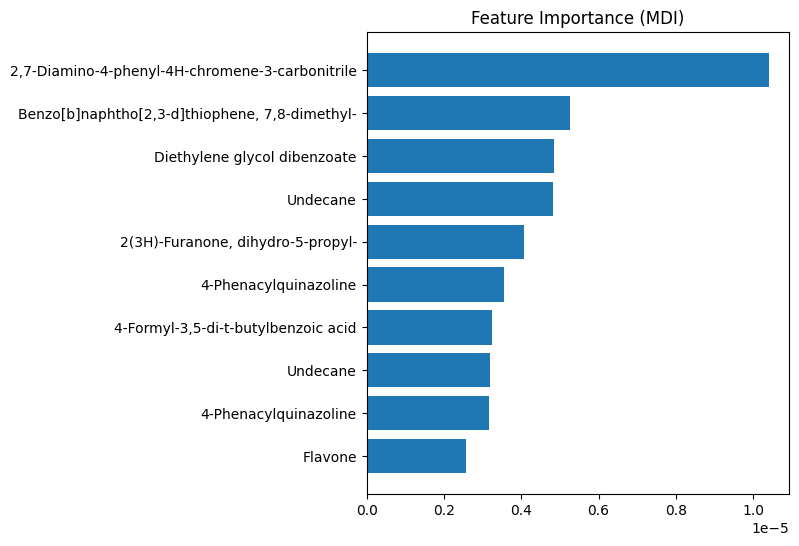

In [267]:
plot.plot_feature_importance(np.abs(clf_lr_disc_pixel.coef_[0]), features_name)

### LASSO

In [268]:
clf_lasso_disc_pixel = LogisticRegression(random_state=0, penalty='l1', solver='saga').fit(features, y=[labels_dict[label] for label in labels])

The max_iter was reached which means the coef_ did not converge


In [269]:
scores_lasso_disc_pixel = cross_val_score(clf_lasso_disc_pixel, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores_lasso_disc_pixel))

0.8


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


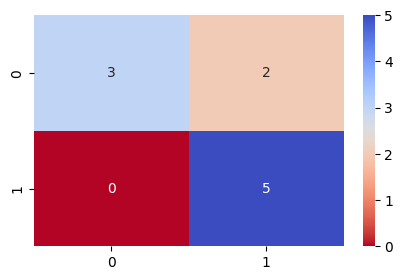

In [270]:
pred = cross_val_predict(clf_lasso_disc_pixel, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

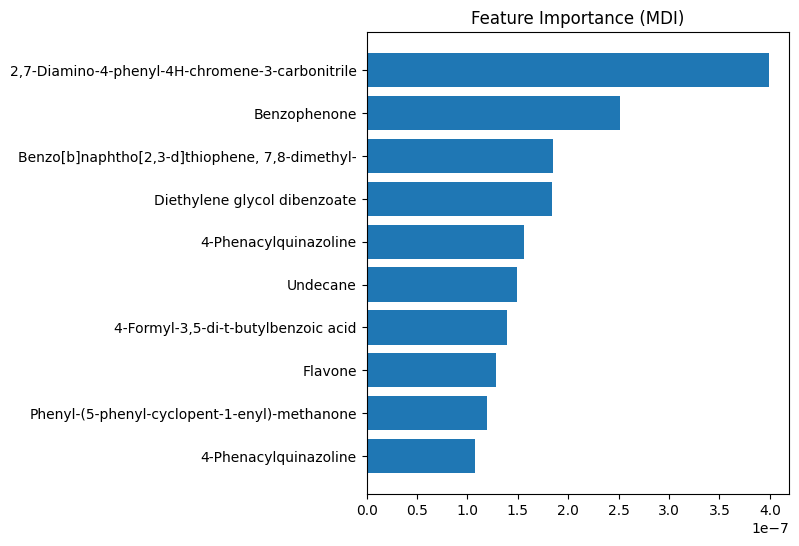

In [271]:
plot.plot_feature_importance(clf_lasso_disc_pixel.coef_[0], features_name)

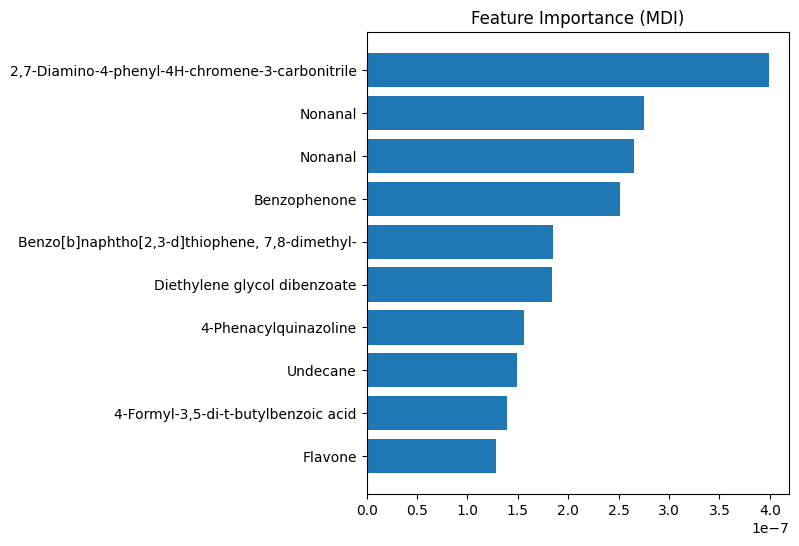

In [272]:
plot.plot_feature_importance(np.abs(clf_lasso_disc_pixel.coef_[0]), features_name)

### Ridge

In [273]:
# LogisticRegression with l2 penaly
clf_rc_disc_pixel = RidgeClassifier().fit(features, y=[labels_dict[label] for label in labels])

In [274]:
scores_rc_disc_pixel = cross_val_score(clf_rc_disc_pixel, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores_rc_disc_pixel))

1.0


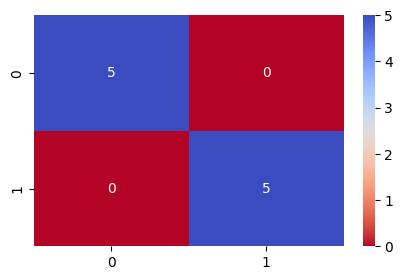

In [275]:
pred = cross_val_predict(clf_rc_disc_pixel, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

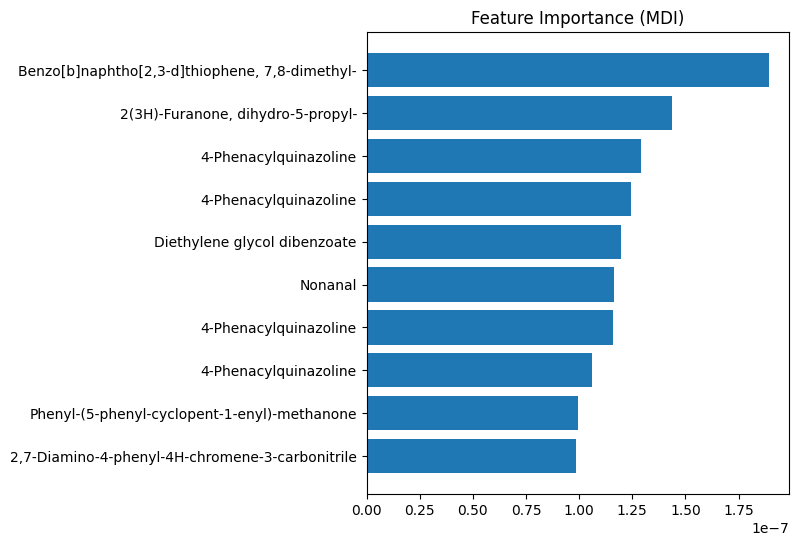

In [276]:
plot.plot_feature_importance(clf_rc_disc_pixel.coef_[0], features_name)

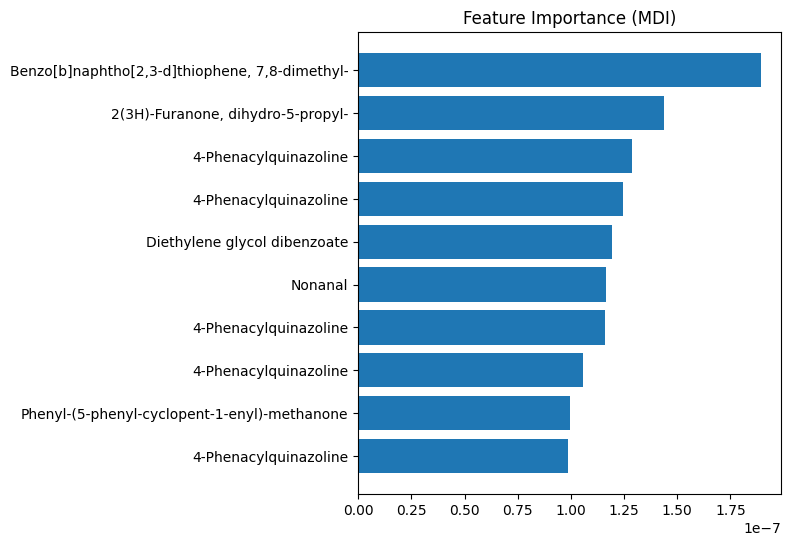

In [277]:
plot.plot_feature_importance(np.abs(clf_rc_disc_pixel.coef_[0]), features_name)

### SVM

In [278]:
clf_linear_svc_disc_pixel = svm.LinearSVC()
clf_linear_svc_disc_pixel.fit(features, y=[labels_dict[label] for label in labels])

Liblinear failed to converge, increase the number of iterations.


LinearSVC()

In [279]:
scores_linear_svc_disc_pixel = cross_val_score(clf_linear_svc_disc_pixel, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
print(np.mean(scores_linear_svc_disc_pixel))

0.8


Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.


Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.


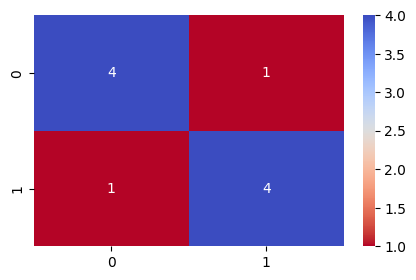

In [280]:
pred = cross_val_predict(clf_linear_svc_disc_pixel, features, y=[labels_dict[label] for label in labels], cv=LeaveOneOut())
conf_mat = confusion_matrix([labels_dict[label] for label in labels], pred)
plot.plot_confusion_matrix(conf_mat)

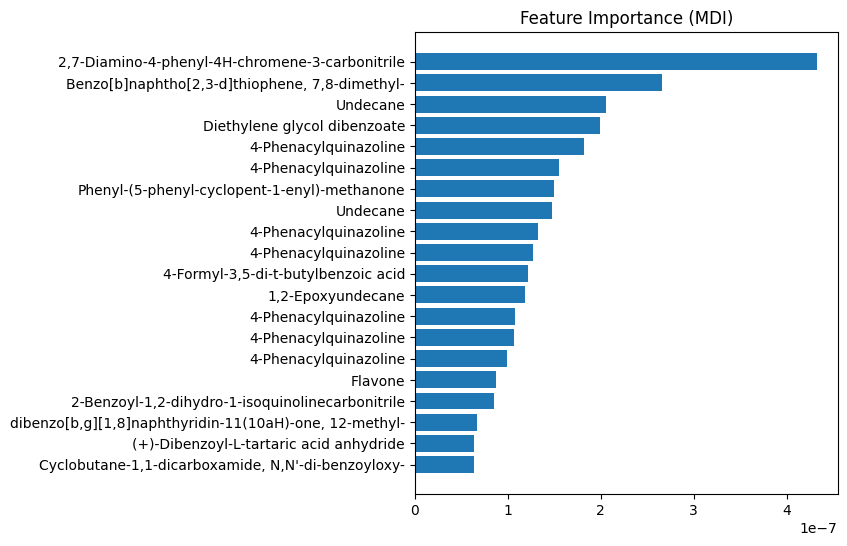

In [281]:
plot.plot_feature_importance((clf_linear_svc_disc_pixel.coef_[0]), features_name, 20)

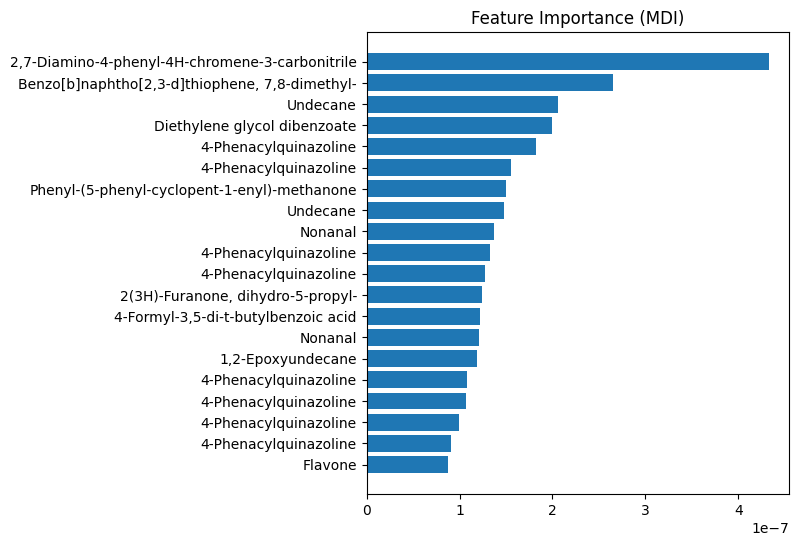

In [282]:
plot.plot_feature_importance(np.abs(clf_linear_svc_disc_pixel.coef_[0]), features_name, 20)

# Synthese

| LOO 5v5|Multivariate disc. mol|Univariate disc mol|Disc. pixels|
|--------------|-----------------|----------------|----------------|
| RandomForest |0.4|0.9|1.0|
| GradBoost |0.1|-|-|
|LogisticRegression|0.4|0.7|0.9|
| Lasso |0.5|0.8|0.8|
| Ridge |0.7|0.6 ?|1.0|
|SVM|0.7|0.7|0.8|
